In [114]:
pd.set_option('display.max_columns', 1000)

In [2]:
#  -------------------------------------------


###  INPUT ###
import pandas as pd
input_data = pd.read_csv('2023_smartFarm_AI_hackathon_dataset.csv')


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# def preprocessing(input_data):
#     input_data = input_data.sort_values(["frmDist","date"])
#     input_data["date"] = pd.to_datetime(input_data["date"], format='%Y%m%d')

#     input_data = input_data.copy()
#     input_data["frmYearWeek"] = input_data.date.dt.strftime('%Y-%W')
#     input_data["frmYear"] = input_data.date.dt.strftime('%Y')
#     input_data["frmWeek"] = input_data.date.dt.strftime('%W').astype(int)
#     input_data = input_data.sort_values("frmYearWeek")


#     tmp_df = input_data.groupby(["frmDist", 'frmYearWeek']).max().reset_index()

#     # 16주 이상 농장만
#     frmDist_list = (tmp_df.groupby("frmDist").frmYearWeek.count() >= 16).reset_index()

#     tmp_df = pd.merge(frmDist_list.loc[frmDist_list.frmYearWeek,["frmDist"]], tmp_df, on="frmDist")

#     start_point = ((tmp_df['outtrn_cumsum'] == 0)&
#     (tmp_df['outtrn_cumsum'].shift(-1, fill_value=False) != 0) & 
#     (tmp_df['outtrn_cumsum'].shift(1, fill_value=False) == 0))

#     x_cols = ['inTp', 'inHd', 'otmsuplyqy', 'acSlrdQy', 'cunt', 
#                'ph', 'outTp', 'outWs', 'daysuplyqy', 'inCo2', 'ec', 
#                'frtstGrupp', 'lefstalklt', 'frtstSetCo', 'pllnLt',
#                'flanGrupp', 'frtstCo', 'flanJnt', 'tcdmt', 'frmhsFclu', 'hvstGrupp',
#                'hvstJnt', 'grwtLt', 'fcluHg', 'lefLt', 'flwrCo', 'hvstCo', 'lefCunt',
#                'frtstJnt', 'lefBt', 'stemThck', 'frmAr', 'frmDov', 'outtrn_cumsum',
#                'WaterUsage', 'WaterCost', 'FertilizerUsage', 'FertilizerCost',
#                'CO2Usage', 'CO2Cost', 'MistUsageTime', 'Mist Cost',
#                'HeatingEnergyUsage_cumsum'] 


#     agg_dict = {i:'mean' for i in x_cols}
#     agg_dict["HeatingEnergyUsage_cumsum"] = 'max'
#     agg_dict["outtrn_cumsum"] = 'max'
#     agg_dict["frmAr"] = 'mean'
#     agg_dict["frmDist"] = 'first'
#     agg_dict["frmWeek"] = 'first'
#     agg_dict["date"] = 'first'
    
#     result_list = []
#     for i in tmp_df[start_point].index:
#         sub_df = tmp_df[(i-7):(i+9)]
# #         display(sub_df.iloc[12:13, :])
#         if sub_df.shape[0] != 16:
# #             print("NONONO", sub_df.shape[0], sub_df.frmDist.first)
#             continue
# #         if sub_df.frmDist.values[0] == "DBSF1673":
# #             display(sub_df)
#         result = sub_df.groupby('frmDist').agg(agg_dict)
#         result_list.append(result)

#     result_df = pd.concat(result_list, ignore_index=True)
#     result_df

#     result_df["outtrn_cumsum"] = result_df["outtrn_cumsum"] /  result_df["frmAr"]
#     result_df["outtrn_cumsum"] = result_df["outtrn_cumsum"] /  result_df["frmAr"]
    
#     return result_df



def preprocessing_t(input_data):
    input_data = input_data.sort_values(["frmDist","date"]).copy()
    input_data["date"] = pd.to_datetime(input_data["date"], format='%Y%m%d')

    input_data = input_data.copy()
    input_data["frmYearWeek"] = input_data.date.dt.strftime('%Y-%W')
    input_data["frmYear"] = input_data.date.dt.strftime('%Y')
    input_data["frmWeek"] = input_data.date.dt.strftime('%W').astype(int)
    input_data = input_data.sort_values("frmYearWeek")


    tmp_df = input_data.groupby(["frmDist", 'frmYearWeek']).max().reset_index()

    # 16주 이상 농장만
    frmDist_list = (tmp_df.groupby("frmDist").frmYearWeek.count() >= 16).reset_index()

    tmp_df = pd.merge(frmDist_list.loc[frmDist_list.frmYearWeek,["frmDist"]], tmp_df, on="frmDist")

    start_point = ((tmp_df['outtrn_cumsum'] == 0)&
    (tmp_df['outtrn_cumsum'].shift(-1, fill_value=False) != 0) & 
    (tmp_df['outtrn_cumsum'].shift(1, fill_value=False) == 0))

#     x_cols = ['inTp', 'inHd', 'otmsuplyqy', 'cunt', 'ph', 'outTp', 'outWs', 'daysuplyqy', 'inCo2', 'ec',
#     'frtstGrupp', 'lefstalklt', 'frtstSetCo',
#     'pllnLt', 'flanGrupp', 'frtstCo', 'flanJnt', 'tcdmt', 'frmhsFclu',
#     'hvstGrupp', 'hvstJnt', 'grwtLt', 'fcluHg', 'lefLt', 'flwrCo', 'hvstCo',
#     'lefCunt', 'frtstJnt', 'lefBt', 'stemThck', 'frmAr', 'frmDov',
#      'WaterUsage', 'WaterCost', 'FertilizerUsage',
#     'FertilizerCost', 'CO2Usage', 'CO2Cost', 'MistUsageTime', 'Mist Cost'] 


#     agg_dict = {i:['max','min','mean'] for i in x_cols}
#     agg_dict["HeatingEnergyUsage_cumsum"] = 'max'
#     agg_dict["outtrn_cumsum"] = 'max'
#     agg_dict["frmAr"] = 'max'
#     agg_dict["frmDist"] = 'first'
#     agg_dict["date"] = 'first'


    result_list = []
    for i in tmp_df[start_point].index:
        sub_df = tmp_df[(i-7):(i+9)]
        if sub_df.shape[0] != 16:
#             print("NONONO", sub_df.shape[0], sub_df.frmDist.first)
            continue
        result_list.append(sub_df)

    result_df = pd.concat(result_list, ignore_index=True)
#     result_df.columns = list(map('_'.join, result_df.columns.values))
    return result_df


# ... (Data preprocessing code here)
# input_data = input_data.drop(columns=['frmDist'])

input_data = preprocessing_t(input_data)

# Split the data into training and testing sets
X = input_data[input_data.drop(columns=['outtrn_cumsum','HeatingEnergyUsage_cumsum', "frmDist", "date"]).columns]
Y = input_data[['outtrn_cumsum','HeatingEnergyUsage_cumsum']]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)

# Initialize and train the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict 'y' values using the trained model
# X_test= scaler.transform(X_test)
y_pred = model.predict(X_test)


# Calculate RMSE between the predictions and actual 'y' values
def calculate_rmse(targets, predictions):
    """
    Calculate the Root Mean Squared Error (RMSE) between predicted and target values.

    :param predictions: Predicted values.
    :type predictions: array-like
    :param targets: Target values.
    :type targets: array-like
    :return: RMSE value.
    :rtype: float
    """
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(targets, predictions))


# Calculate r2_score between the predictions and actual 'y' values
def calculate_R2_score(y_test,y_pred):
    from sklearn.metrics import r2_score
    return r2_score(y_test, y_pred)


rmse = calculate_rmse(y_test, y_pred)
r2score = calculate_R2_score(y_test, y_pred)

### OUTPUT ###
print("RMSE:", rmse)
print("R2_score:", r2score)


NameError: name 'preprocessing' is not defined

In [66]:
X_train

inTp        inHd  otmsuplyqy     acSlrdQy       cunt  frmWeek  \
139  21.579053  103.662680  215.482337  1764.800428  15.109190       35   
60   21.383987   99.864847  157.056200  1589.261771  13.462915       37   
204  21.605913   99.550119  157.347958  1571.158094  12.719069       37   
186  24.417385   92.290049   99.163018     0.000000   8.515764       35   
207  22.901144   96.909076   91.125414  1694.205552  18.313795       34   
..         ...         ...         ...          ...        ...      ...   
106  22.840403   99.980209  217.602218  1731.363886  15.211406       35   
14   19.086331   88.824249  114.854811  1497.180263  10.703831       49   
92   21.243247   97.472587   88.570406   985.029762  13.437954       38   
179  21.998736  100.174120  215.119060  1756.360620  15.580714       35   
102  26.018953   96.467091    0.000000  1944.251917   0.000000       27   

           ph      outTp     outWs  daysuplyqy  ...   frmAr  frmDov  \
139  6.731088  15.475829  0.000000         0.0  ...  3400.0     8.2   
60   6.308647  13.038494  2.003266         0.0  ...   800.0     8.4   
204  6.331793  13.432383  1.934878         0.0  ...   800.0     8.4   
186  6.179938  17.039772  1.608389         0.0  ...  1500.0    12.1   
207  6.388982  18.286654  1.486898         0.0  ...  1200.0     7.9   
..        ...        ...       ...         ...  ...     ...     ...   
106  6.633069  16.179152  0.000000         0.0  ...  3400.0     8.2   
14   5.347604   5.397789  0.000000         0.0  ...   900.0     7.6   
92   6.335330   7.927286  1.456942         0.0  ...   800.0     9.4   
179  6.625872  16.373538  0.000000         0.0  ...  3400.0     8.2   
102  0.000000  24.362700  0.000000         0.0  ...  1300.0     8.8   

     WaterUsage  WaterCost  FertilizerUsage  FertilizerCost  CO2Usage  \
139         0.0        0.0              0.0             0.0       0.0   
60          0.0        0.0              0.0             0.0       0.0   
204         0.0        0.0              0.0             0.0       0.0   
186         0.0        0.0              0.0             0.0       0.0   
207         0.0        0.0              0.0             0.0       0.0   
..          ...        ...              ...             ...       ...   
106         0.0        0.0              0.0             0.0       0.0   
14          0.0        0.0              0.0             0.0       0.0   
92          0.0        0.0              0.0             0.0       0.0   
179         0.0        0.0              0.0             0.0       0.0   
102         0.0        0.0              0.0             0.0       0.0   

     CO2Cost  MistUsageTime  Mist Cost  
139      0.0            0.0        0.0  
60       0.0            0.0        0.0  
204      0.0            0.0        0.0  
186      0.0            0.0        0.0  
207      0.0            0.0        0.0  
..       ...            ...        ...  
106      0.0            0.0        0.0  
14       0.0            0.0        0.0  
92       0.0            0.0        0.0  
179      0.0            0.0        0.0  
102      0.0            0.0        0.0  

[192 rows x 42 columns]

In [140]:
#  -------------------------------------------


###  INPUT ###
import pandas as pd
input_data = pd.read_csv('2023_smartFarm_AI_hackathon_dataset.csv')


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf




def preprocessing_t(input_data):
    input_data = input_data.sort_values(["frmDist","date"]).copy()
    input_data["date"] = pd.to_datetime(input_data["date"], format='%Y%m%d')

    input_data = input_data.copy()
    input_data["frmYearWeek"] = input_data.date.dt.strftime('%Y-%W')
    input_data["frmYear"] = input_data.date.dt.strftime('%Y')
    input_data["frmWeek"] = input_data.date.dt.strftime('%W').astype(int)
    
    input_data = input_data[input_data["inTp"]!= 0]
    input_data = input_data[input_data["inHd"]!= 0]
    input_data = input_data.sort_values("frmYearWeek")

    tmp_df = input_data.groupby(["frmDist", 'frmYearWeek']).max().reset_index()

    # 16주 이상 농장만
    frmDist_list = (tmp_df.groupby("frmDist").frmYearWeek.count() >= 16).reset_index()

    tmp_df = pd.merge(frmDist_list.loc[frmDist_list.frmYearWeek,["frmDist"]], tmp_df, on="frmDist")

    start_point = ((tmp_df['outtrn_cumsum'] == 0)&
    (tmp_df['outtrn_cumsum'].shift(-1, fill_value=False) != 0) & 
    (tmp_df['outtrn_cumsum'].shift(1, fill_value=False) == 0))

#     x_cols = ['inTp', 'inHd', 'otmsuplyqy', 'cunt', 'ph', 'outTp', 'outWs', 'daysuplyqy', 'inCo2', 'ec',
#     'frtstGrupp', 'lefstalklt', 'frtstSetCo',
#     'pllnLt', 'flanGrupp', 'frtstCo', 'flanJnt', 'tcdmt', 'frmhsFclu',
#     'hvstGrupp', 'hvstJnt', 'grwtLt', 'fcluHg', 'lefLt', 'flwrCo', 'hvstCo',
#     'lefCunt', 'frtstJnt', 'lefBt', 'stemThck', 'frmAr', 'frmDov',
#      'WaterUsage', 'WaterCost', 'FertilizerUsage',
#     'FertilizerCost', 'CO2Usage', 'CO2Cost', 'MistUsageTime', 'Mist Cost'] 


#     agg_dict = {i:['max','min','mean'] for i in x_cols}
#     agg_dict["HeatingEnergyUsage_cumsum"] = 'max'
#     agg_dict["outtrn_cumsum"] = 'max'
#     agg_dict["frmAr"] = 'max'
#     agg_dict["frmDist"] = 'first'
#     agg_dict["date"] = 'first'


    result_list = []
    for i in tmp_df[start_point].index:
        sub_df = tmp_df[(i-7):(i+9)]
        if sub_df.shape[0] != 16:
            print("NONONO", sub_df.shape[0], sub_df.frmDist.first)
            continue
        result_list.append(sub_df)

    result_df = pd.concat(result_list, ignore_index=True)
#     result_df.columns = list(map('_'.join, result_df.columns.values))
    return result_df



In [141]:
input_data = preprocessing_t(input_data)

In [142]:
input_data["prev_outtrn_cumsum"] = input_data.groupby("frmDist")['outtrn_cumsum'].shift(1, fill_value=0)

In [143]:
input_data.columns

Index(['frmDist', 'frmYearWeek', 'date', 'inTp', 'inHd', 'otmsuplyqy',
       'acSlrdQy', 'cunt', 'ph', 'outTp', 'outWs', 'daysuplyqy', 'inCo2', 'ec',
       'frmYear', 'frmWeek', 'frtstGrupp', 'lefstalklt', 'frtstSetCo',
       'pllnLt', 'flanGrupp', 'frtstCo', 'flanJnt', 'tcdmt', 'frmhsFclu',
       'hvstGrupp', 'hvstJnt', 'grwtLt', 'fcluHg', 'lefLt', 'flwrCo', 'hvstCo',
       'lefCunt', 'frtstJnt', 'lefBt', 'stemThck', 'frmAr', 'frmDov',
       'outtrn_cumsum', 'WaterUsage', 'WaterCost', 'FertilizerUsage',
       'FertilizerCost', 'CO2Usage', 'CO2Cost', 'MistUsageTime', 'Mist Cost',
       'HeatingEnergyUsage_cumsum', 'prev_outtrn_cumsum'],
      dtype='object')

In [144]:
input_data[input_data.inTp==0]

Empty DataFrame
Columns: [frmDist, frmYearWeek, date, inTp, inHd, otmsuplyqy, acSlrdQy, cunt, ph, outTp, outWs, daysuplyqy, inCo2, ec, frmYear, frmWeek, frtstGrupp, lefstalklt, frtstSetCo, pllnLt, flanGrupp, frtstCo, flanJnt, tcdmt, frmhsFclu, hvstGrupp, hvstJnt, grwtLt, fcluHg, lefLt, flwrCo, hvstCo, lefCunt, frtstJnt, lefBt, stemThck, frmAr, frmDov, outtrn_cumsum, WaterUsage, WaterCost, FertilizerUsage, FertilizerCost, CO2Usage, CO2Cost, MistUsageTime, Mist Cost, HeatingEnergyUsage_cumsum, prev_outtrn_cumsum]
Index: []

In [145]:
input_data

frmDist frmYearWeek       date       inTp        inHd  otmsuplyqy  \
0     DBSF1186     2017-35 2017-09-03  28.055877   75.411953   71.572320   
1     DBSF1186     2017-36 2017-09-10  27.125157   92.894846   71.118668   
2     DBSF1186     2017-37 2017-09-17  27.343312   83.836994   81.431768   
3     DBSF1186     2017-38 2017-09-24  26.529758  103.594157   83.637387   
4     DBSF1186     2017-39 2017-10-01  26.477132  102.898720   88.349317   
...        ...         ...        ...        ...         ...         ...   
3835  DBSF9969     2017-46 2017-11-19  19.334761  105.442095  150.623068   
3836  DBSF9969     2017-47 2017-11-26  19.471051  109.464433  240.941895   
3837  DBSF9969     2017-48 2017-12-03  19.403839   88.463689  260.045872   
3838  DBSF9969     2017-49 2017-12-10  18.674555  102.523579  231.239171   
3839  DBSF9969     2017-50 2017-12-17  16.987337  105.899540  262.007795   

         acSlrdQy       cunt        ph      outTp  outWs  daysuplyqy  \
0        0.000000  24.941651  6.711244  23.751200    0.0         0.0   
1        0.000000  14.755254  6.601882  26.681391    0.0         0.0   
2        0.000000  28.088254  6.580945  25.563967    0.0         0.0   
3        0.000000  26.357265  6.516620  24.472829    0.0         0.0   
4        0.000000  29.798443  6.634494  26.369129    0.0         0.0   
...           ...        ...       ...        ...    ...         ...   
3835  1507.278529  13.669290  6.770786   8.511750    0.0         0.0   
3836  1376.344953   6.855567  7.051480   8.820963    0.0         0.0   
3837  1164.988743   6.243336  6.693160   5.879748    0.0         0.0   
3838  1045.856968   6.151063  6.550442   5.068695    0.0         0.0   
3839  1144.493723   9.676790  6.434908  -0.977498    0.0         0.0   

           inCo2        ec frmYear  frmWeek  frtstGrupp  lefstalklt  \
0     375.713830  3.146046    2017       35    0.000000         0.0   
1     373.898047  3.429502    2017       36    0.000000         0.0   
2     399.576790  3.338738    2017       37    0.000000         0.0   
3     394.648707  3.193510    2017       38    1.899566         0.0   
4     380.081975  3.066486    2017       39    2.554466         0.0   
...          ...       ...     ...      ...         ...         ...   
3835  439.173191  2.347450    2017       46    0.000000         0.0   
3836  508.574750  2.516544    2017       47    0.000000         0.0   
3837  478.280270  2.501610    2017       48    0.000000         0.0   
3838  465.042576  2.461407    2017       49    0.000000         0.0   
3839  562.087137  2.721428    2017       50    0.000000         0.0   

      frtstSetCo  pllnLt  flanGrupp    frtstCo  flanJnt  tcdmt  frmhsFclu  \
0            0.0     0.0   0.000000   0.000000      0.0    0.0   0.000000   
1            0.0     0.0   0.000000   0.000000      0.0    0.0   0.000000   
2            0.0     0.0   0.000000   0.000000      0.0    0.0   0.000000   
3            0.0     0.0   2.237949   6.399456      0.0    0.0   2.945643   
4            0.0     0.0   3.413003  10.003566      0.0    0.0   3.990770   
...          ...     ...        ...        ...      ...    ...        ...   
3835         0.0     0.0   0.000000   0.000000      0.0    0.0   0.000000   
3836         0.0     0.0   0.000000   0.000000      0.0    0.0   0.000000   
3837         0.0     0.0   0.000000   0.000000      0.0    0.0   0.000000   
3838         0.0     0.0   0.000000   0.000000      0.0    0.0   0.000000   
3839         0.0     0.0   0.000000   0.000000      0.0    0.0   0.000000   

      hvstGrupp  hvstJnt     grwtLt     fcluHg      lefLt  flwrCo  hvstCo  \
0           0.0      0.0   0.000000   0.000000   0.000000     0.0     0.0   
1           0.0      0.0   0.000000   0.000000   0.000000     0.0     0.0   
2           0.0      0.0   0.000000   0.000000   0.000000     0.0     0.0   
3           0.0      0.0   0.000000  25.791911  39.323548     0.0     0.0   
4           0.0      0.0  27.119696  32.372382  61.091407     0.0 

In [112]:
# tf.random.normal([32, 10, 8])


X = input_data[input_data.drop(columns=['outtrn_cumsum','HeatingEnergyUsage_cumsum', "frmDist", "date", "frmYearWeek"]).columns]
Y = input_data[['outtrn_cumsum','HeatingEnergyUsage_cumsum']]
# model = tf.keras.layers.LSTM(4, return_sequences=True, return_state=True)


# X = X.values.reshape([-1,16,X.shape[1]])
# Y = Y.values.reshape([-1,16, Y.shape[1]])

# np.random.seed(1)
# test_idx = np.random.choice(list(range(X.shape[0])), int(X.shape[0] * 0.2))

# X[~test_idx].shape

# X_train, X_test, y_train, y_test = train_test_split(
#     X, Y, test_size=0.2, random_state=42
# )

# whole_seq_output, final_memory_state, final_carry_state = lstm(X)

In [111]:
96/18

5.333333333333333

In [92]:
scaler = StandardScaler()
scaler.fit(X_train.reshape())

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential() # Sequeatial Model
model.add(tf.keras.layers.LSTM(2, input_shape=(X.shape[1], X.shape[2]), return_sequences=True)) # (timestep, feature)
# model.add(tf.keras.layers.LSTM(2)) # (timestep, feature)
model.compile(loss='mean_squared_error', optimizer='adam')

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [88]:
# model.fit(X,Y, epochs=300)

Epoch 1/300
8/8 [==============================] - 0s 3ms/step - loss: 46986356.0000
Epoch 2/300
8/8 [==============================] - 0s 6ms/step - loss: 46986196.0000
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 46985988.0000
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 46985828.0000
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 46985652.0000
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 46985580.0000
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 46985548.0000
Epoch 8/300
8/8 [==============================] - 0s 3ms/step - loss: 46985512.0000
Epoch 9/300
8/8 [==============================] - 0s 3ms/step - loss: 46985484.0000
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 46985476.0000
Epoch 11/300
8/8 [==============================] - 0s 3ms/step - loss: 46985472.0000
Epoch 12/300
8/8 [==============================] - 0s 3ms/step

8/8 [==============================] - 0s 3ms/step - loss: 46984724.0000
Epoch 97/300
8/8 [==============================] - 0s 5ms/step - loss: 46984724.0000
Epoch 98/300
8/8 [==============================] - 0s 4ms/step - loss: 46984728.0000
Epoch 99/300
8/8 [==============================] - 0s 5ms/step - loss: 46984720.0000
Epoch 100/300
8/8 [==============================] - 0s 3ms/step - loss: 46984724.0000
Epoch 101/300
8/8 [==============================] - 0s 3ms/step - loss: 46984724.0000
Epoch 102/300
8/8 [==============================] - 0s 3ms/step - loss: 46984720.0000
Epoch 103/300
8/8 [==============================] - 0s 5ms/step - loss: 46984720.0000
Epoch 104/300
8/8 [==============================] - 0s 3ms/step - loss: 46984720.0000
Epoch 105/300
8/8 [==============================] - 0s 3ms/step - loss: 46984724.0000
Epoch 106/300
8/8 [==============================] - 0s 2ms/step - loss: 46984720.0000
Epoch 107/300
8/8 [==============================] - 0s 5ms/

KeyboardInterrupt: 

In [80]:
X.columns

Index(['frmYearWeek', 'inTp', 'inHd', 'otmsuplyqy', 'acSlrdQy', 'cunt', 'ph',
       'outTp', 'outWs', 'daysuplyqy', 'inCo2', 'ec', 'frmYear', 'frmWeek',
       'frtstGrupp', 'lefstalklt', 'frtstSetCo', 'pllnLt', 'flanGrupp',
       'frtstCo', 'flanJnt', 'tcdmt', 'frmhsFclu', 'hvstGrupp', 'hvstJnt',
       'grwtLt', 'fcluHg', 'lefLt', 'flwrCo', 'hvstCo', 'lefCunt', 'frtstJnt',
       'lefBt', 'stemThck', 'frmAr', 'frmDov', 'WaterUsage', 'WaterCost',
       'FertilizerUsage', 'FertilizerCost', 'CO2Usage', 'CO2Cost',
       'MistUsageTime', 'Mist Cost', 'prev_outtrn_cumsum'],
      dtype='object')

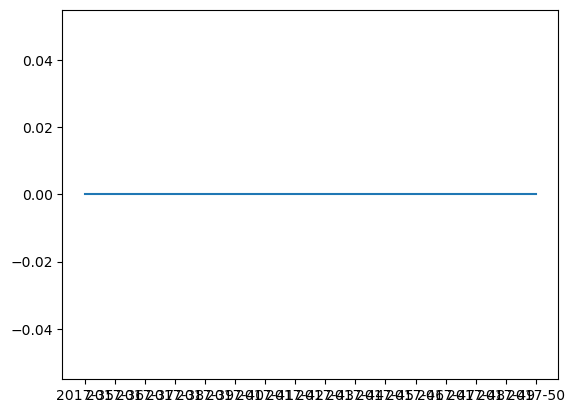

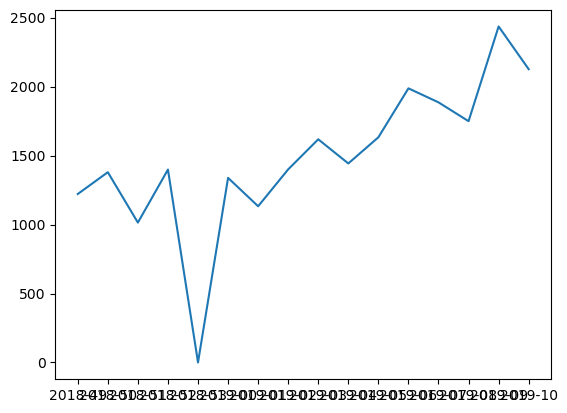

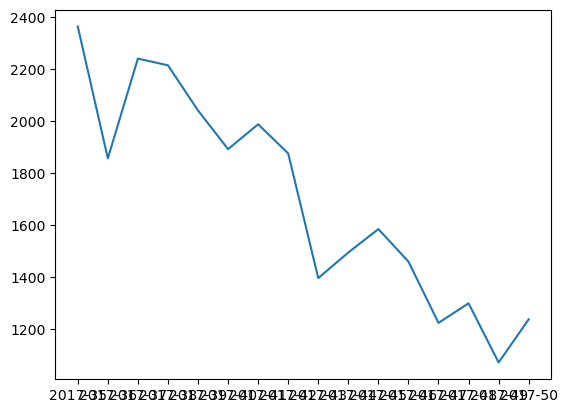

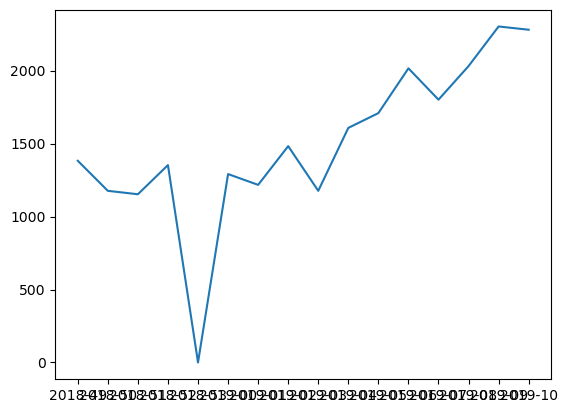

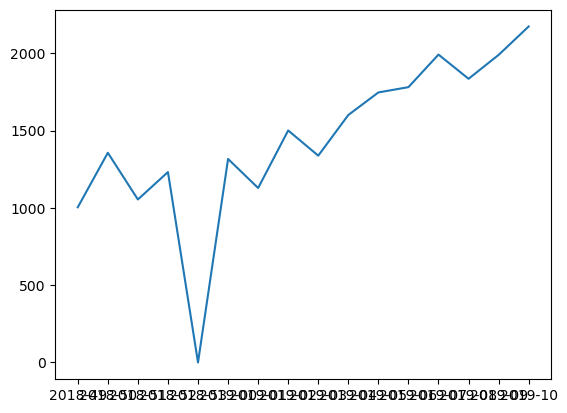

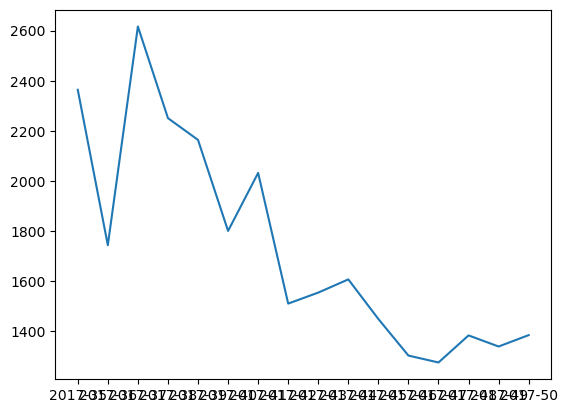

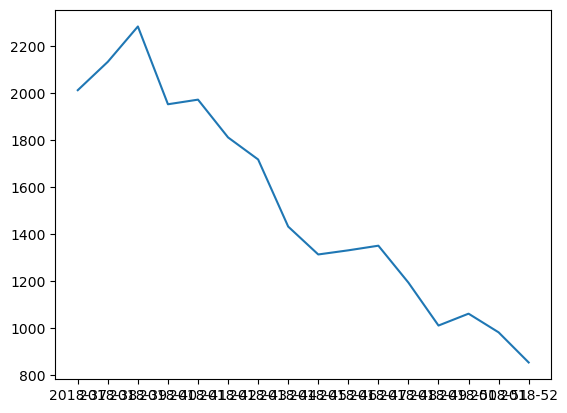

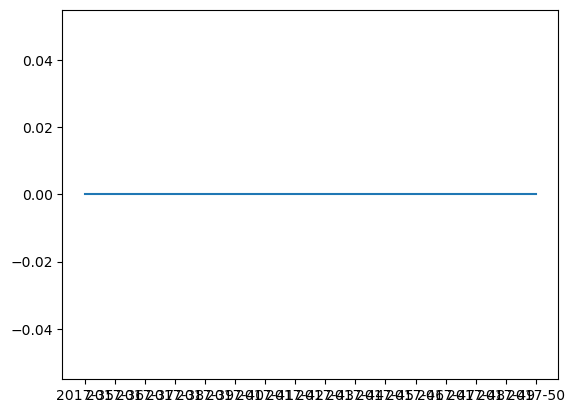

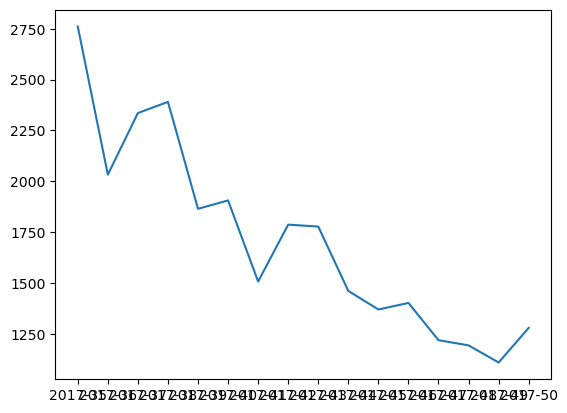

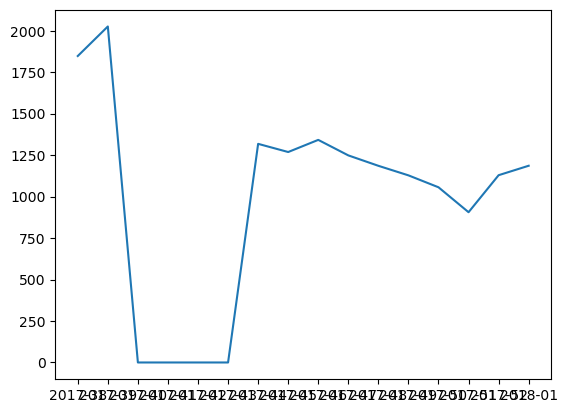

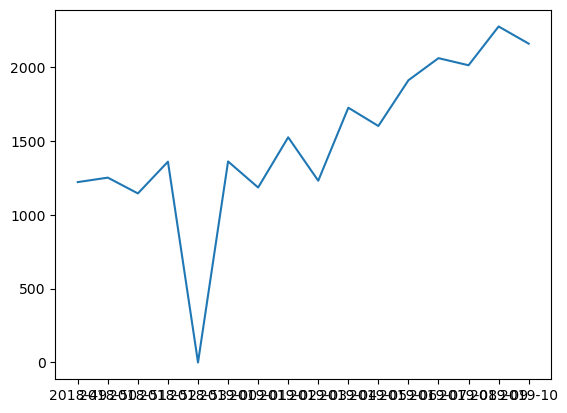

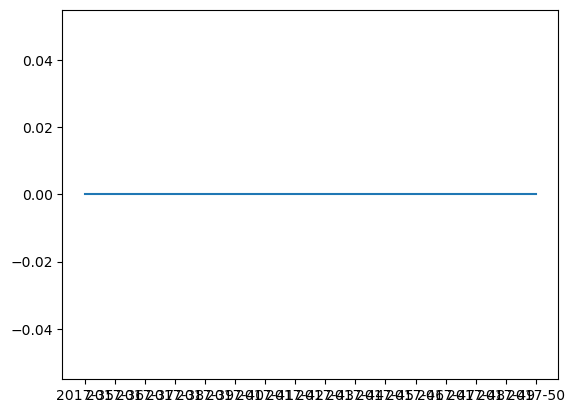

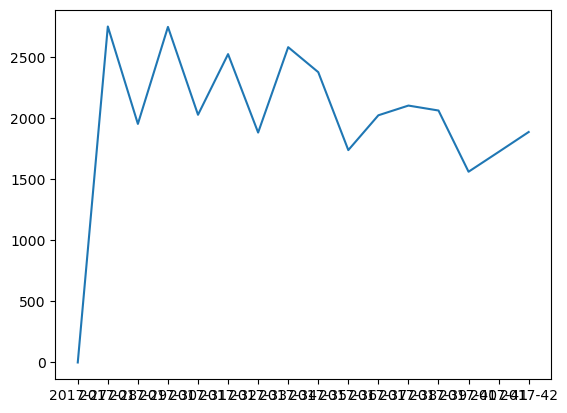

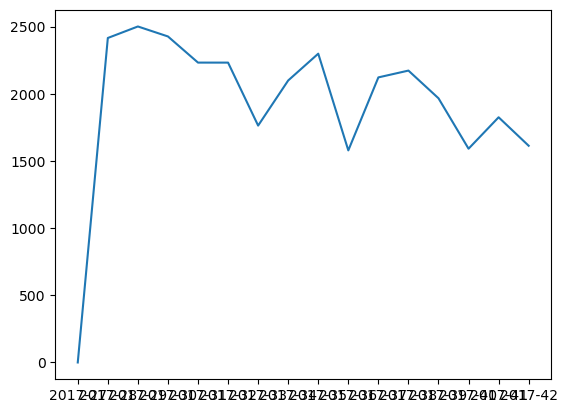

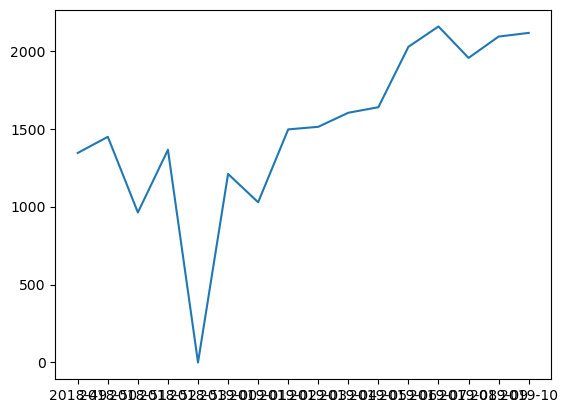

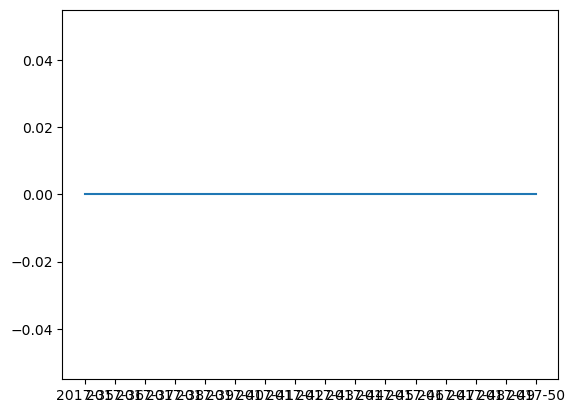

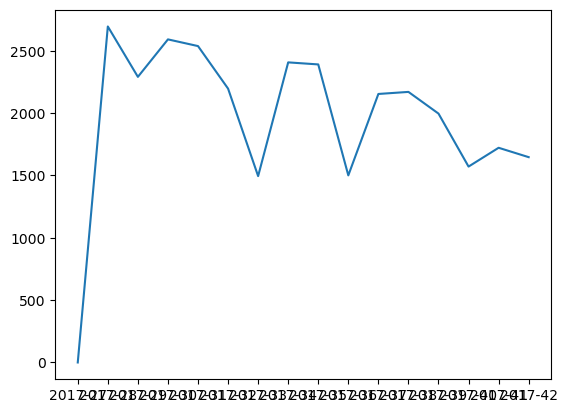

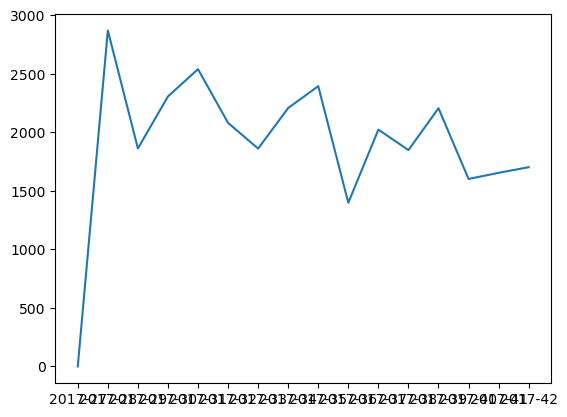

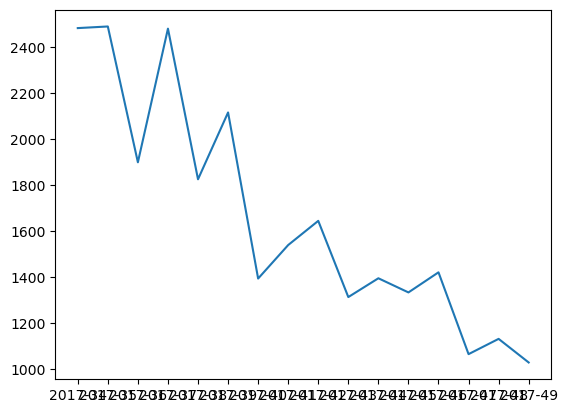

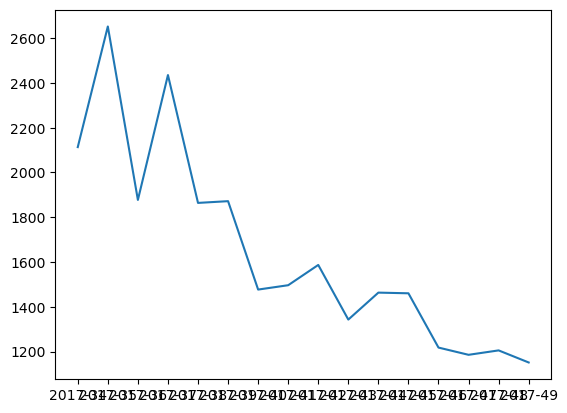

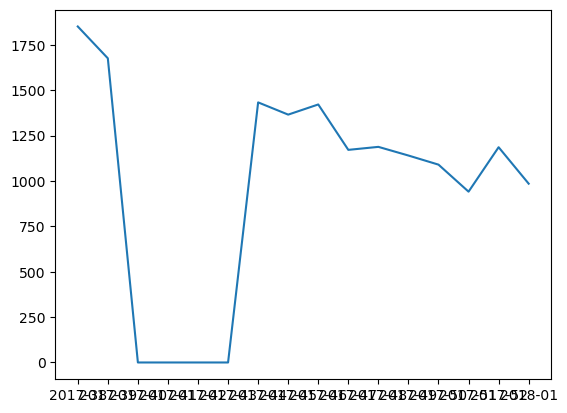

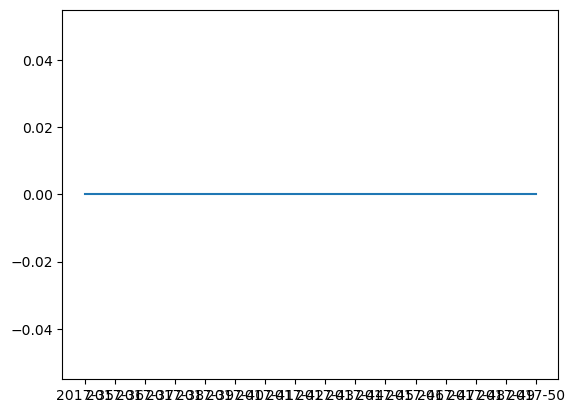

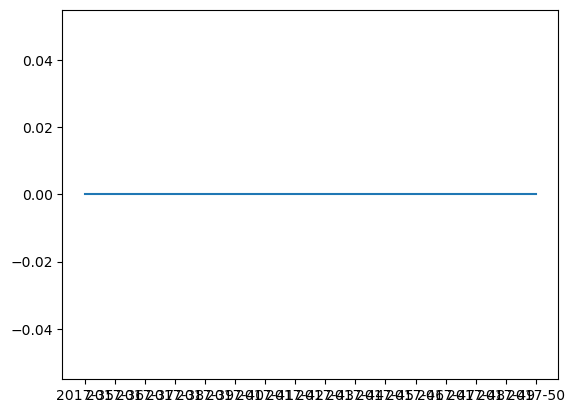

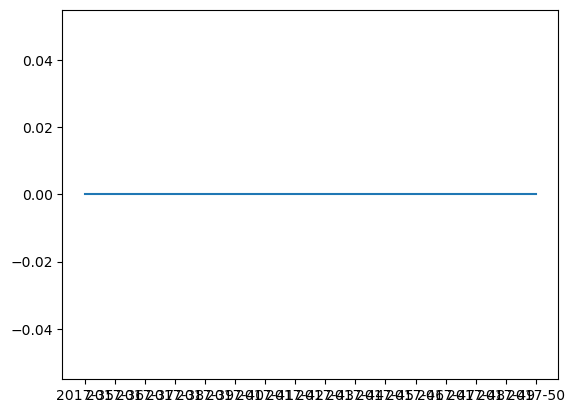

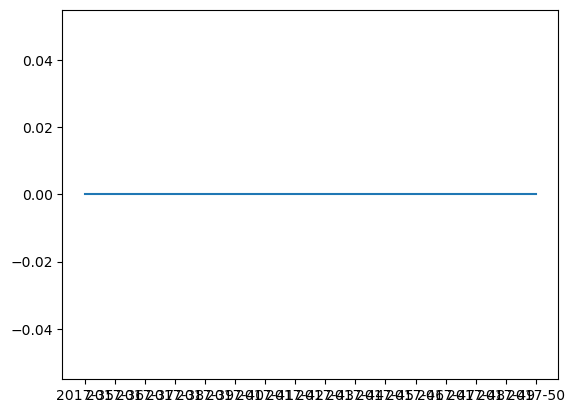

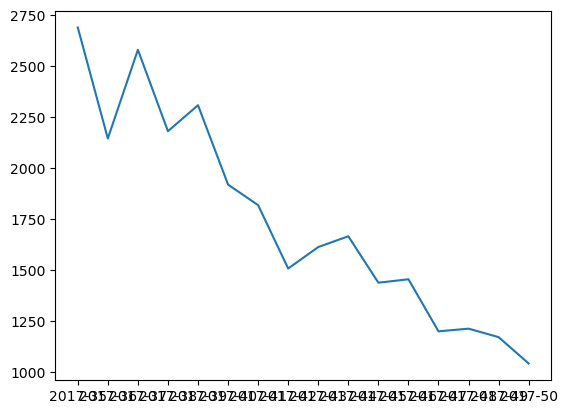

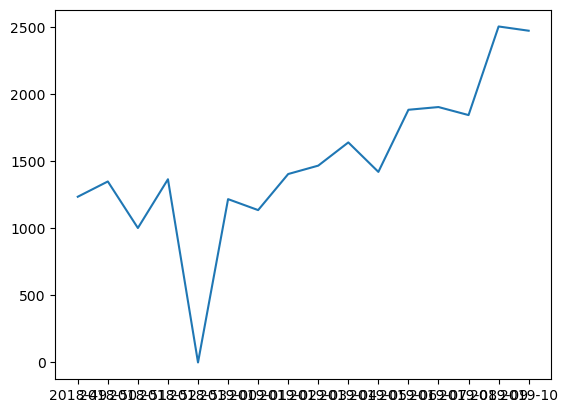

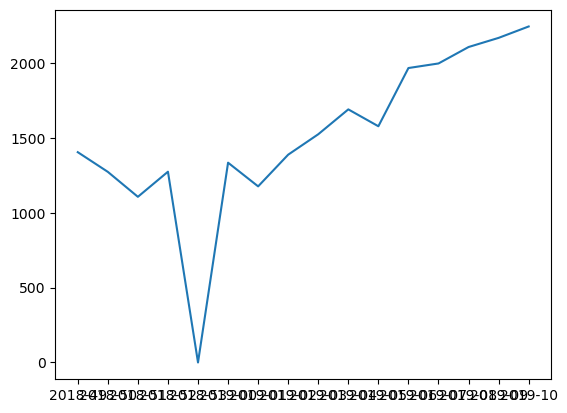

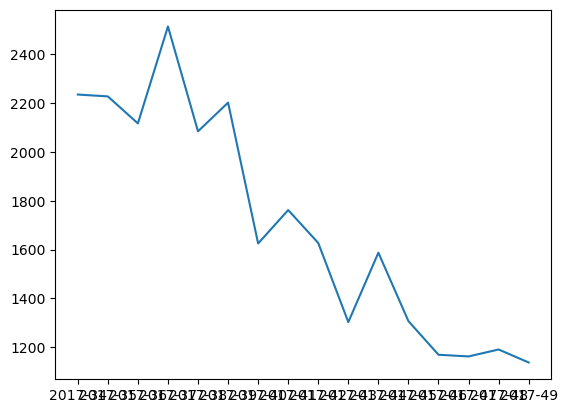

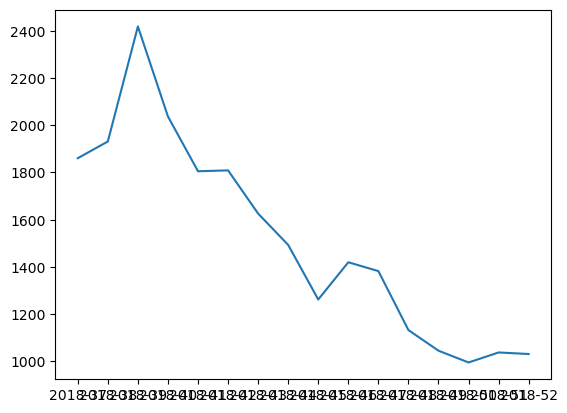

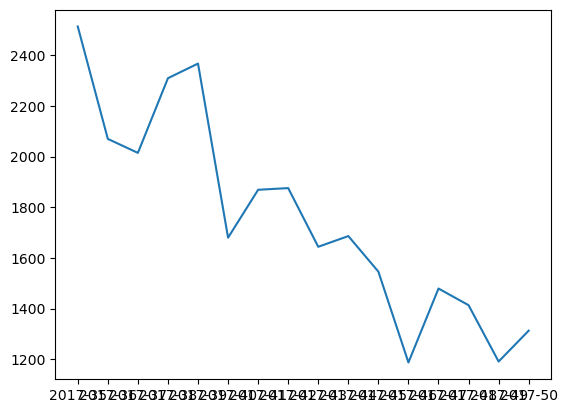

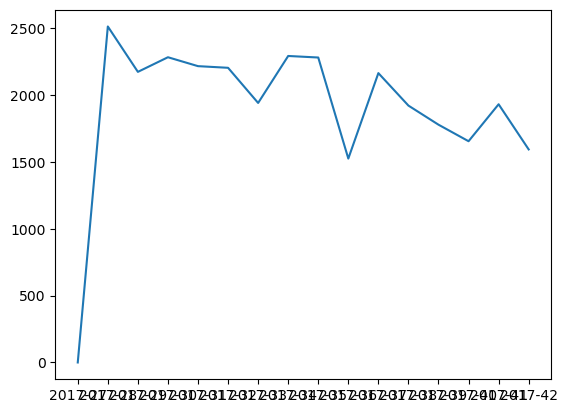

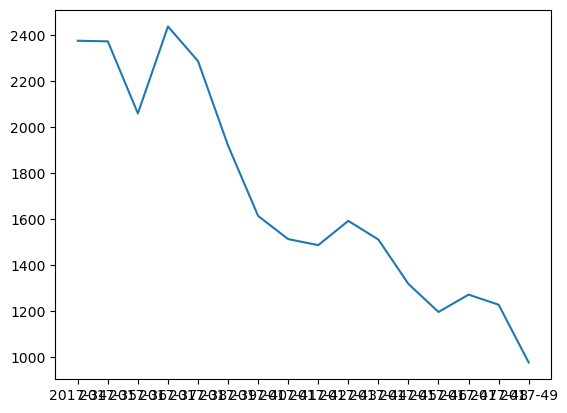

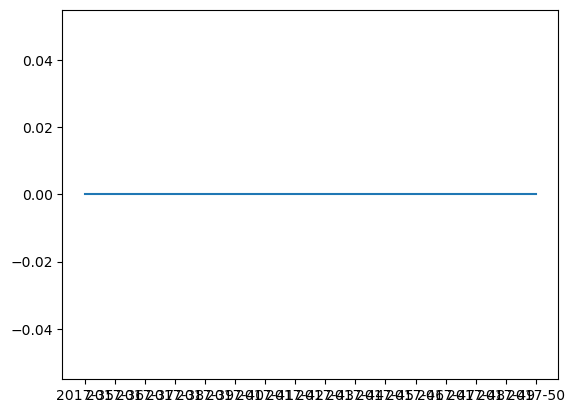

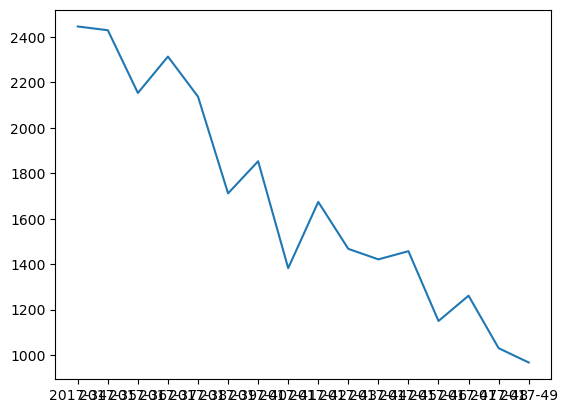

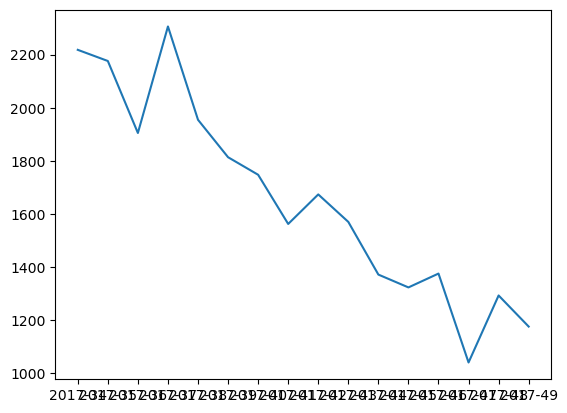

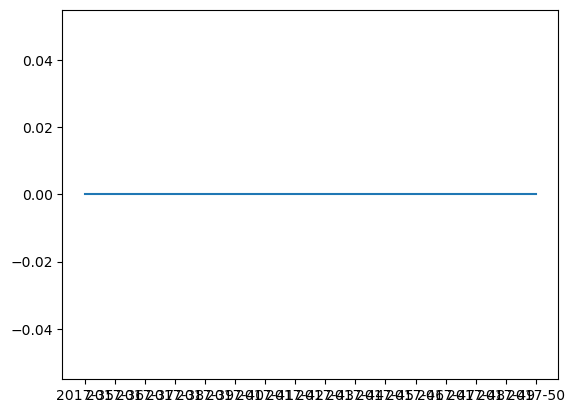

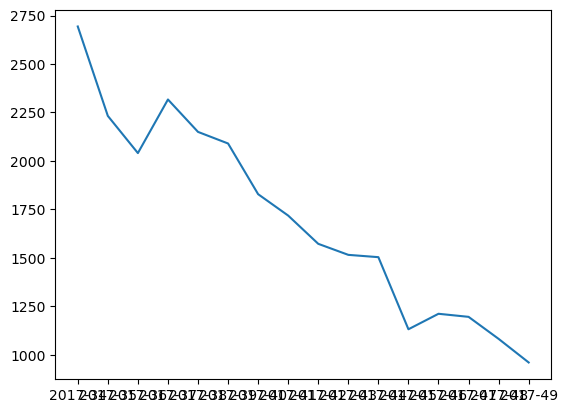

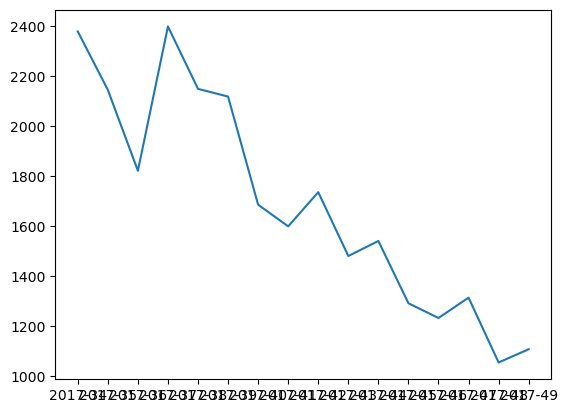

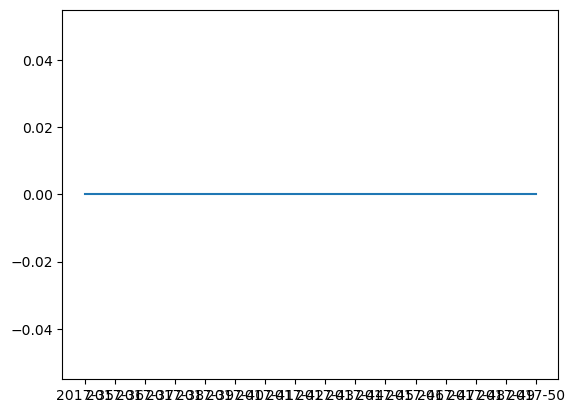

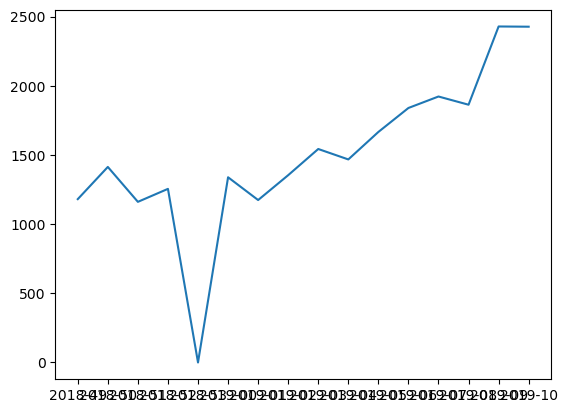

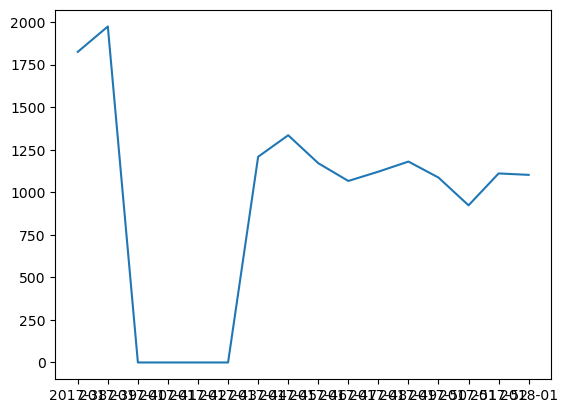

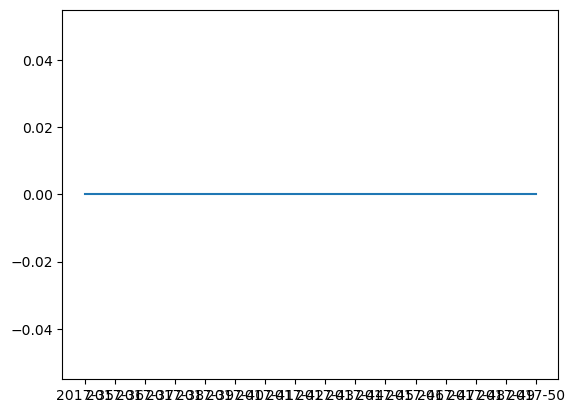

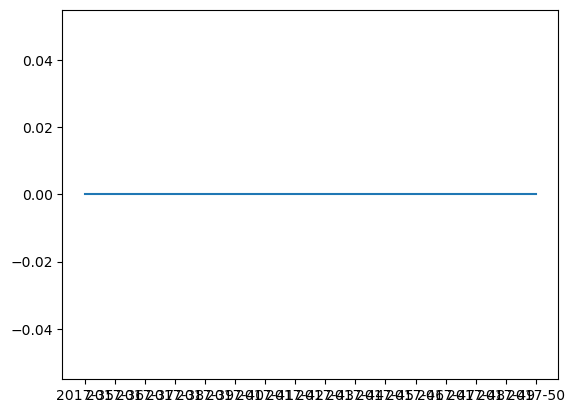

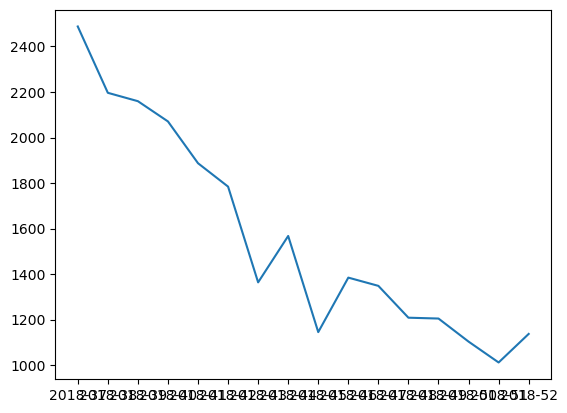

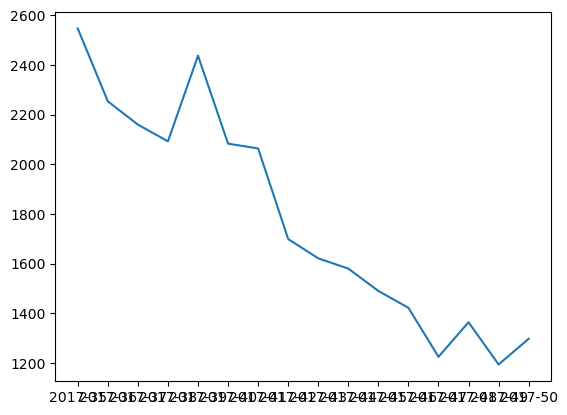

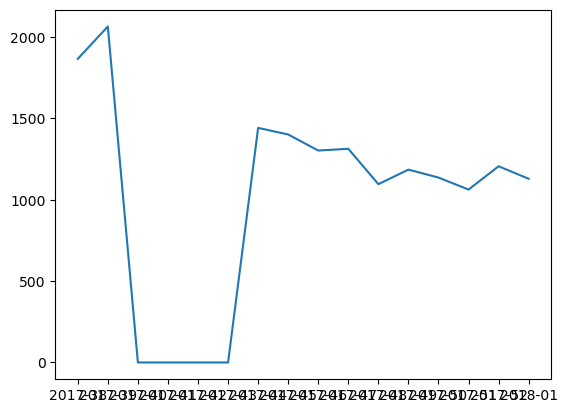

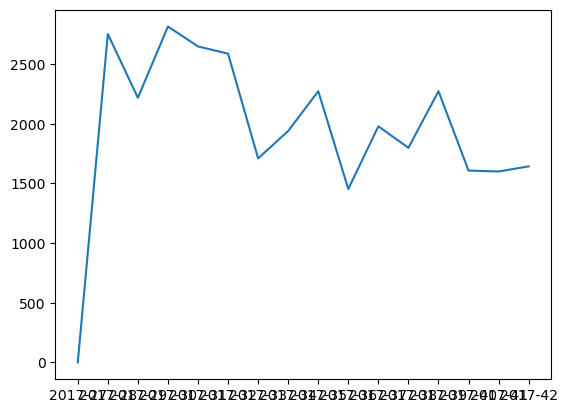

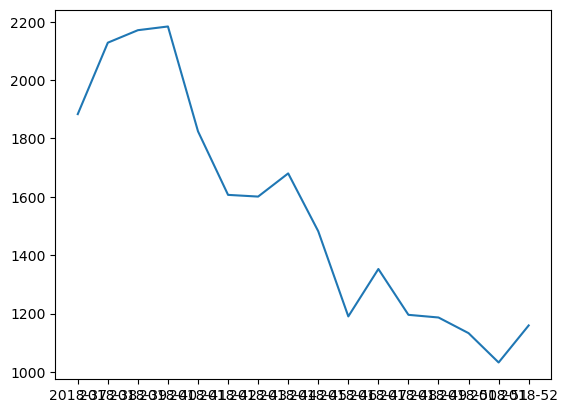

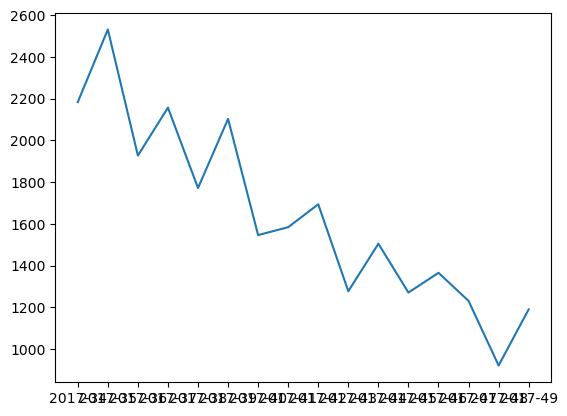

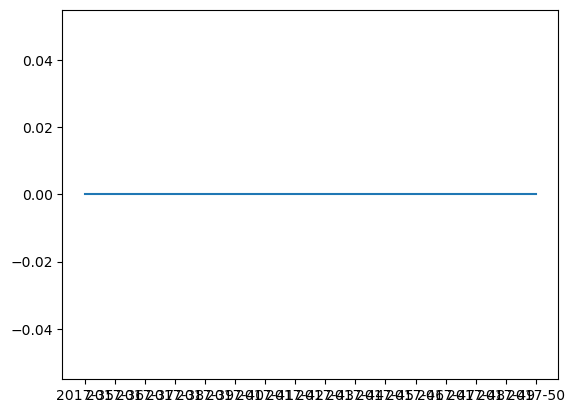

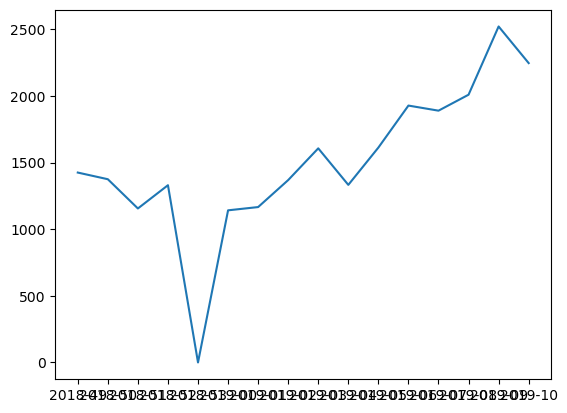

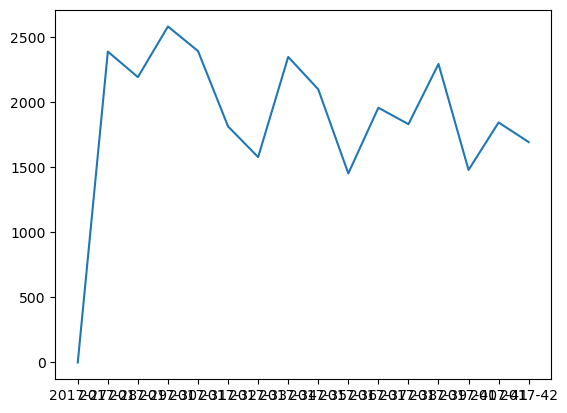

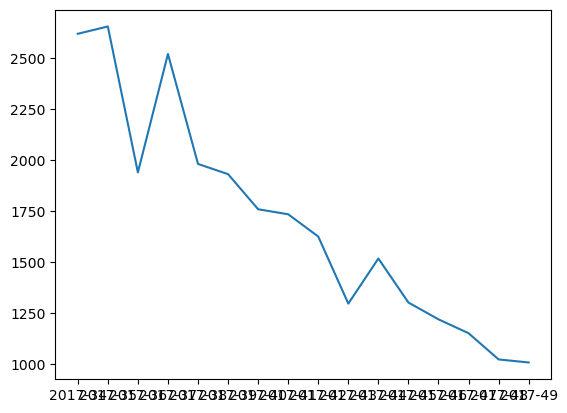

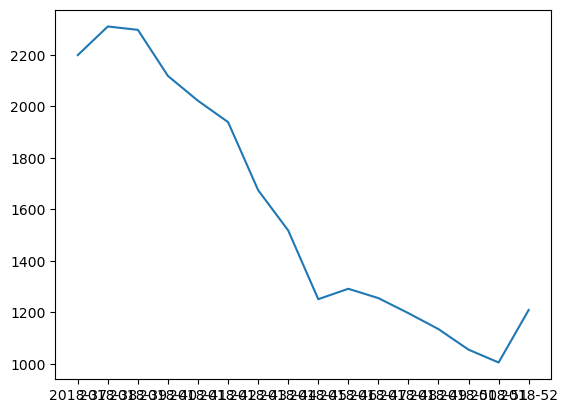

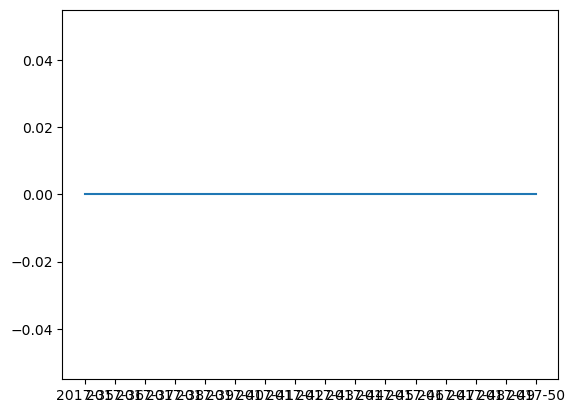

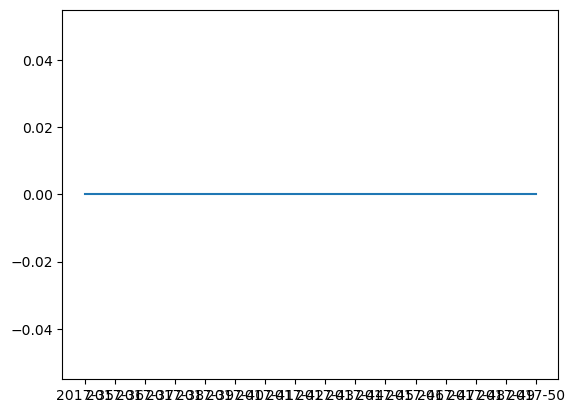

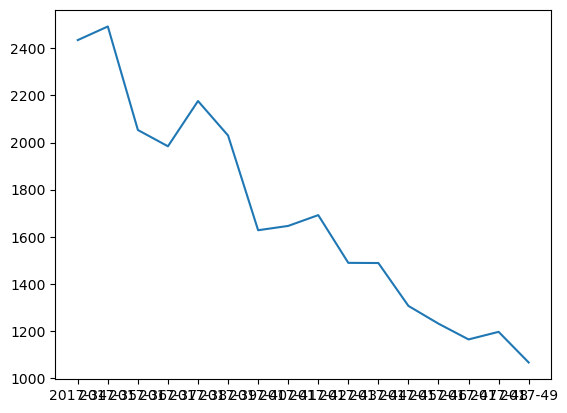

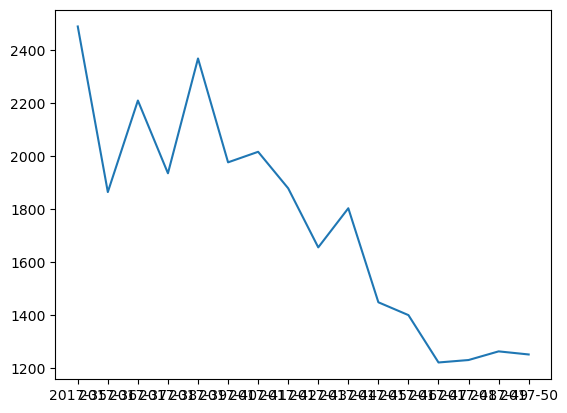

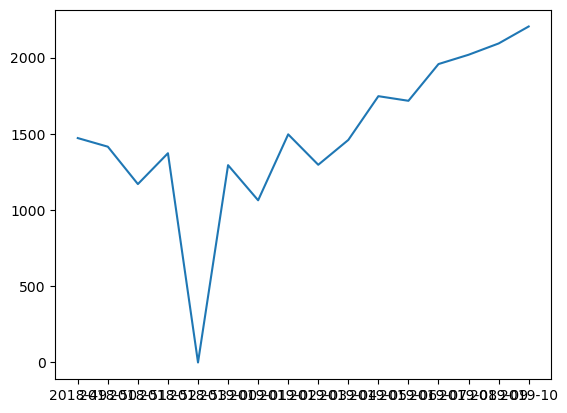

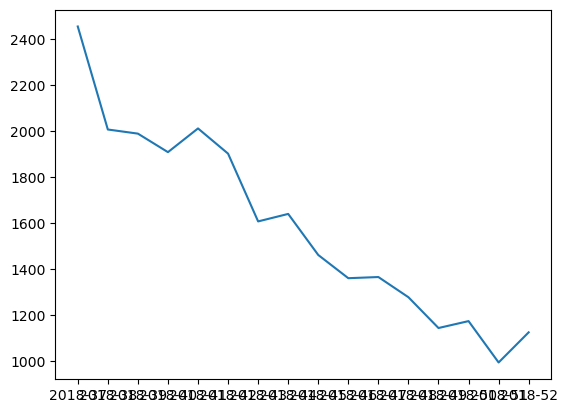

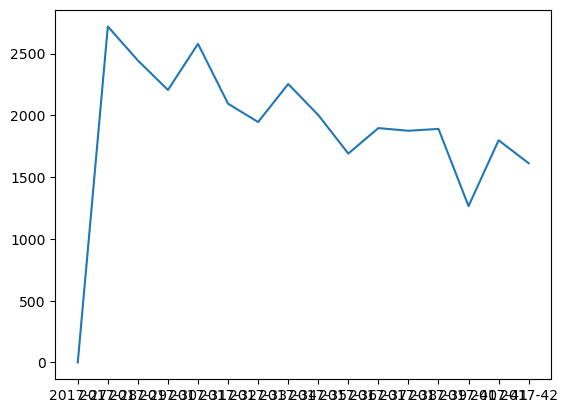

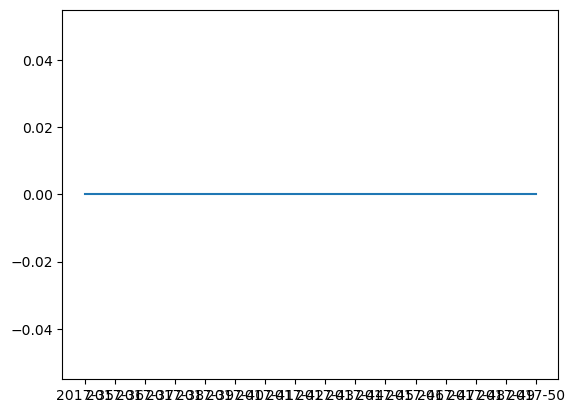

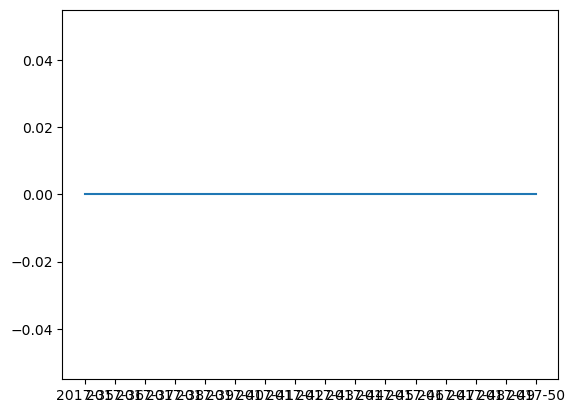

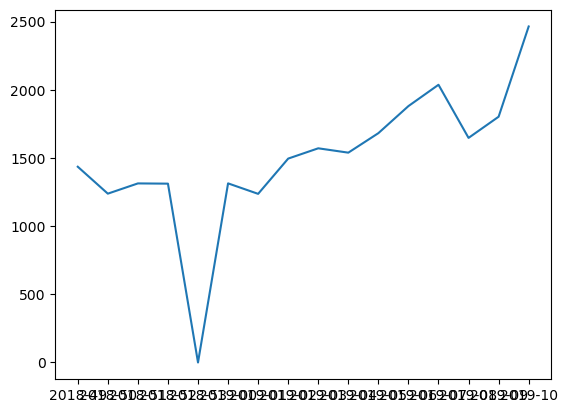

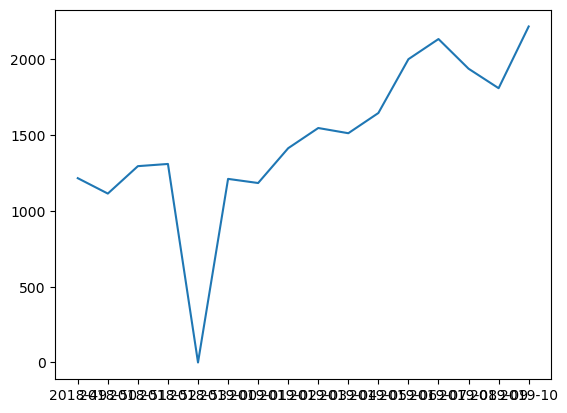

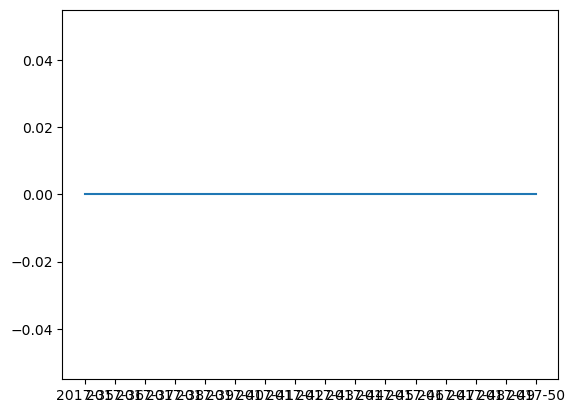

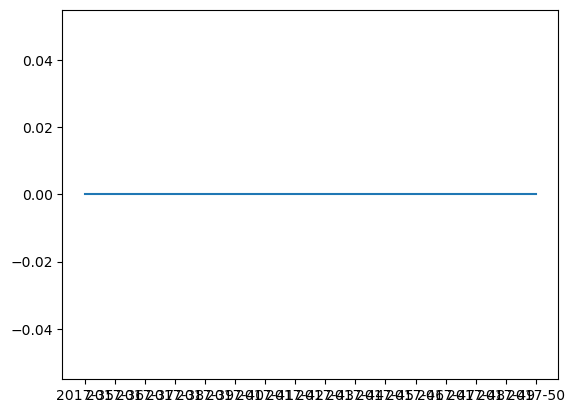

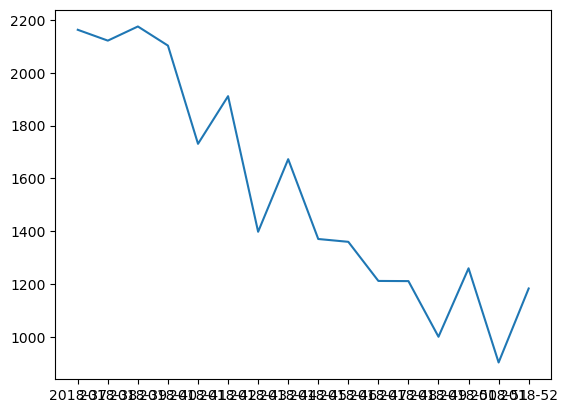

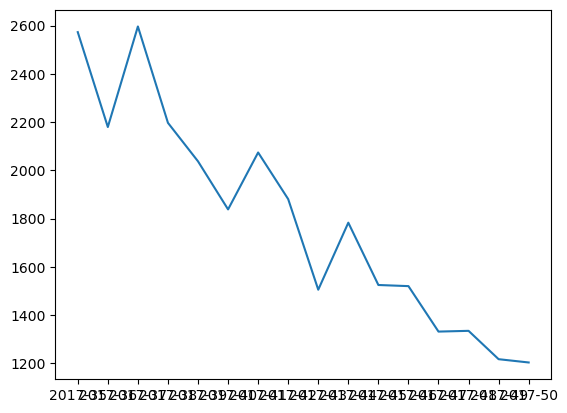

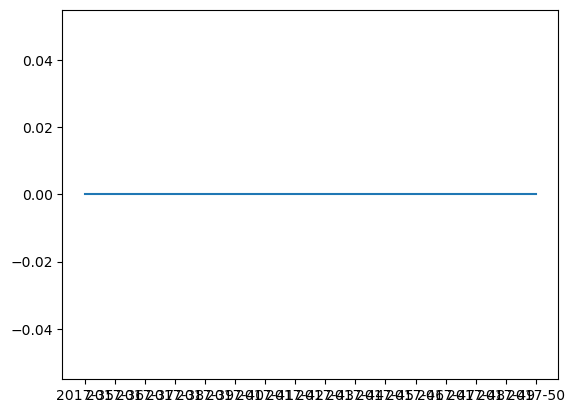

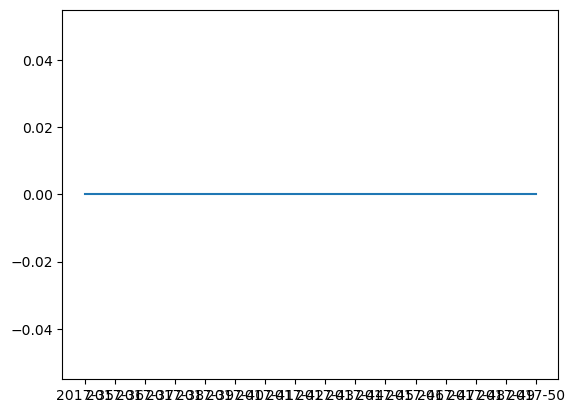

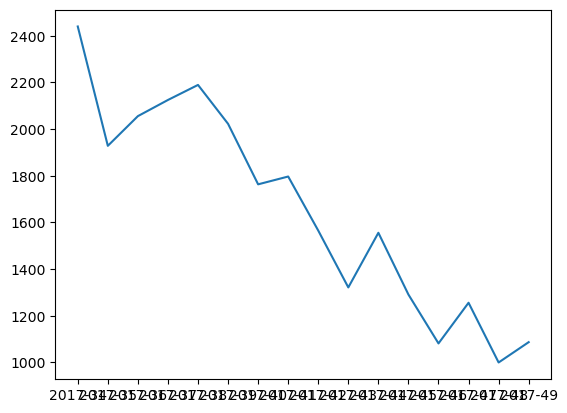

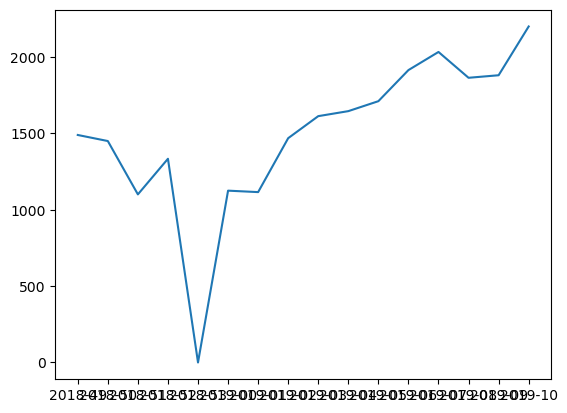

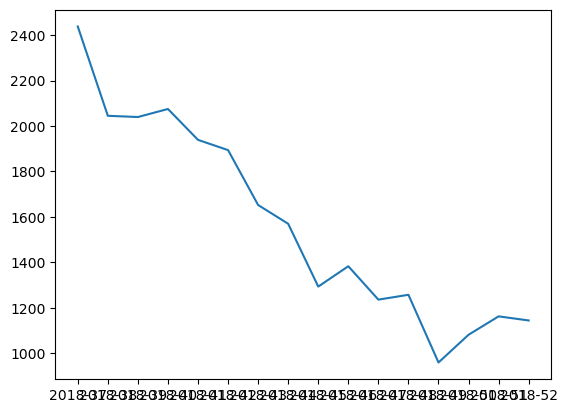

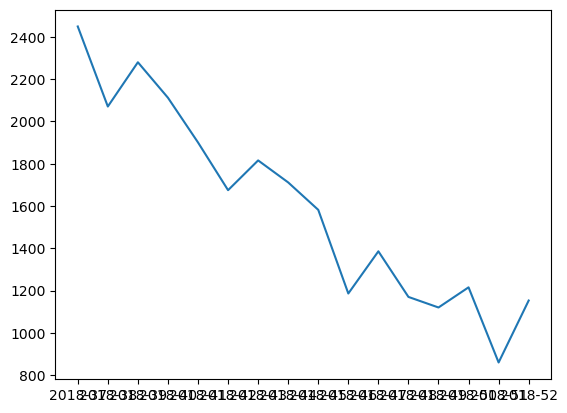

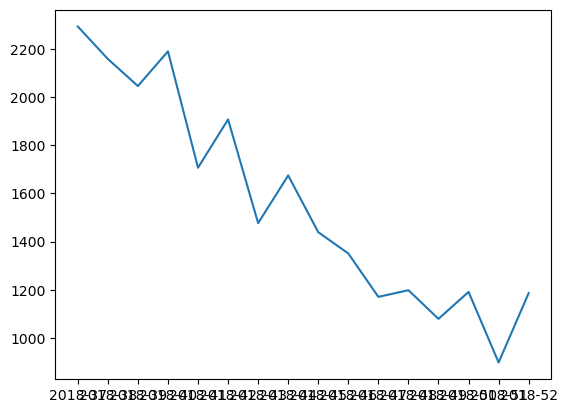

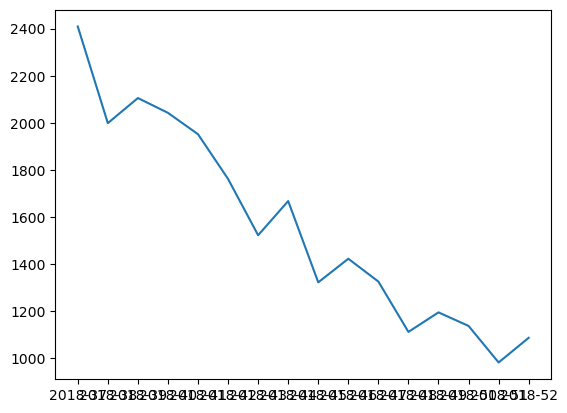

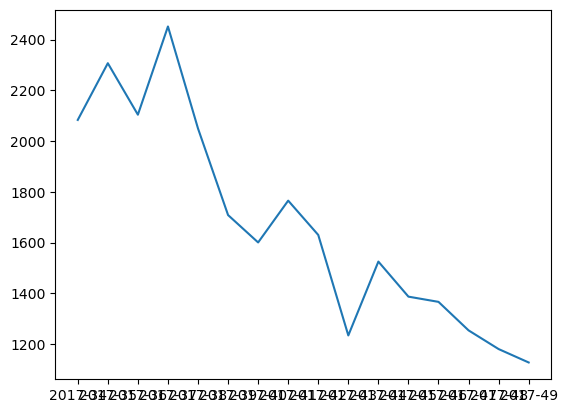

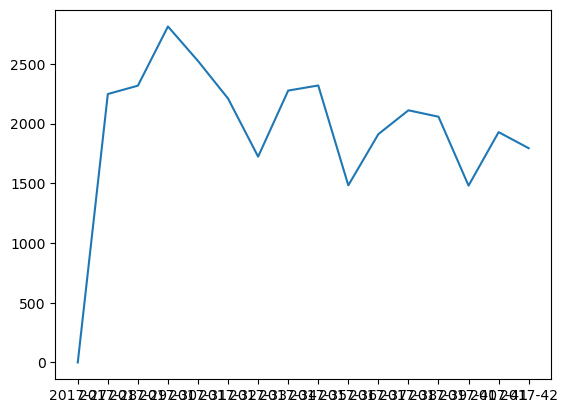

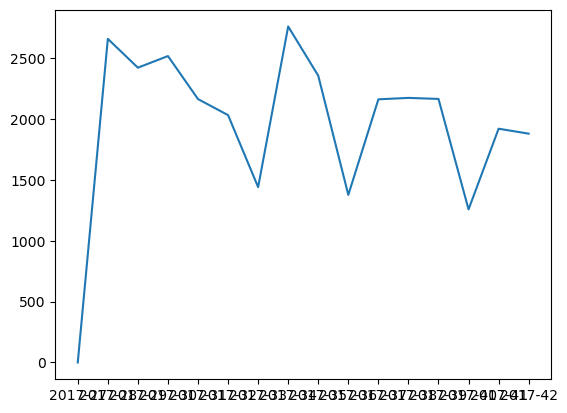

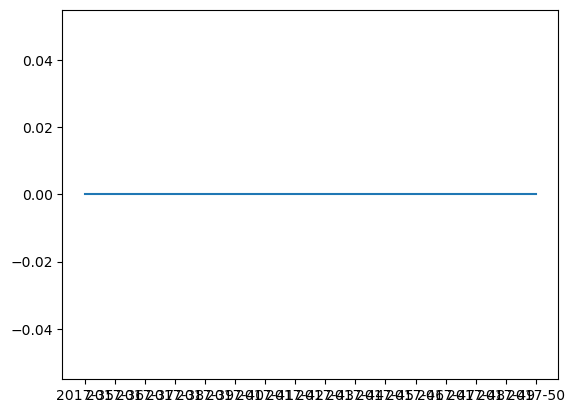

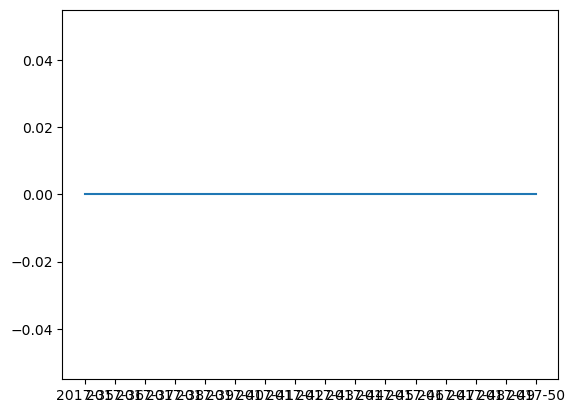

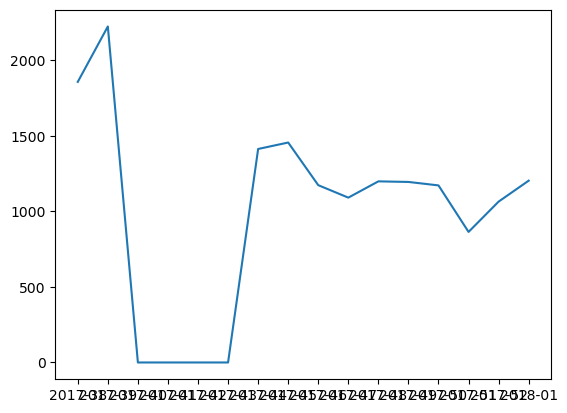

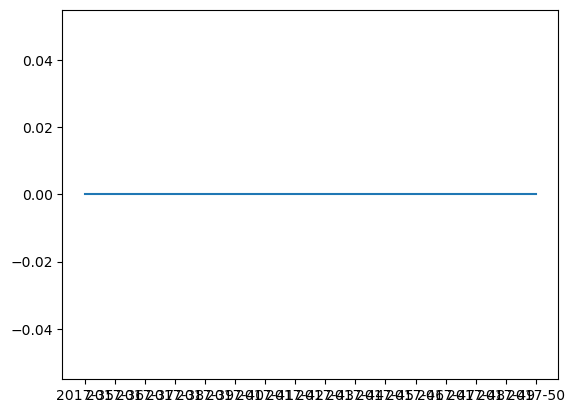

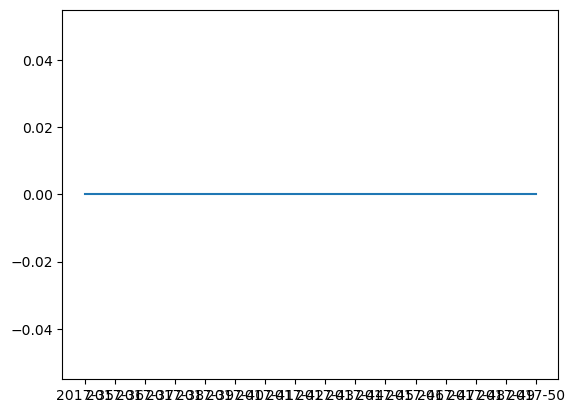

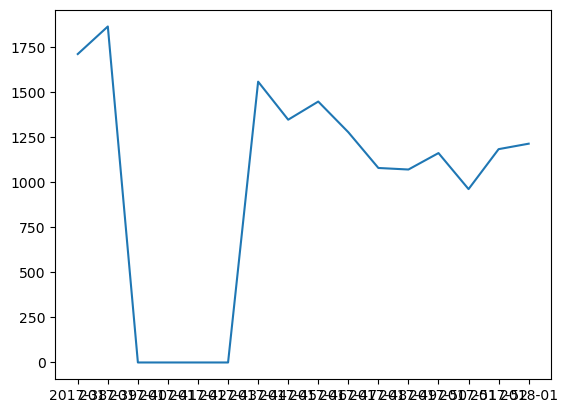

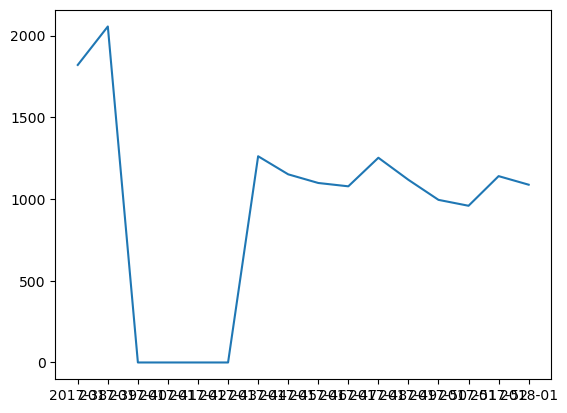

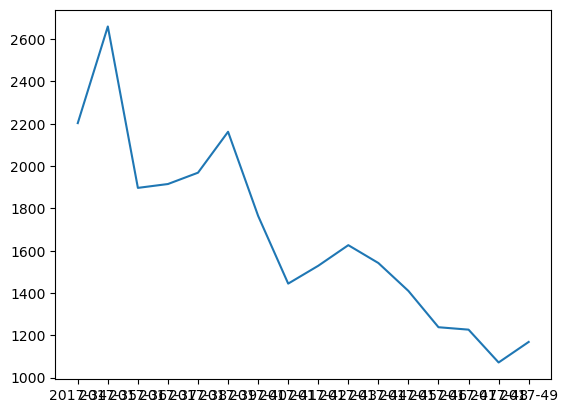

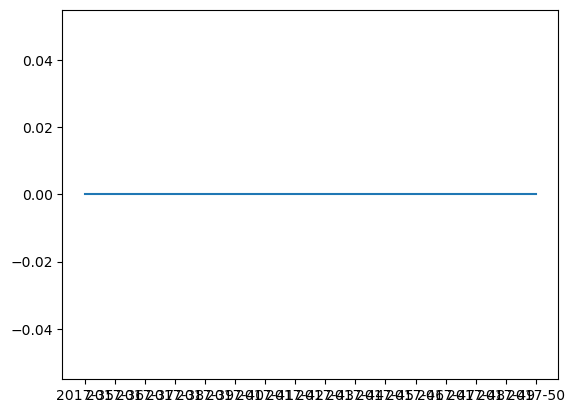

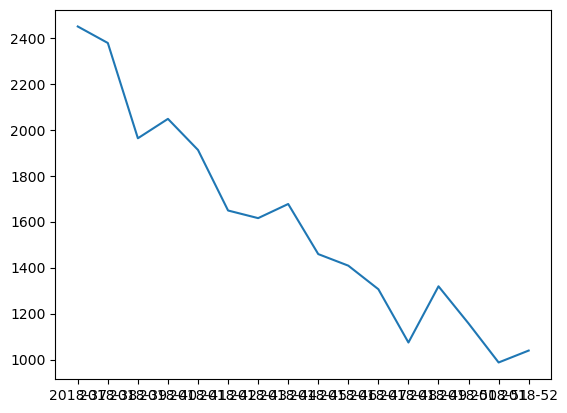

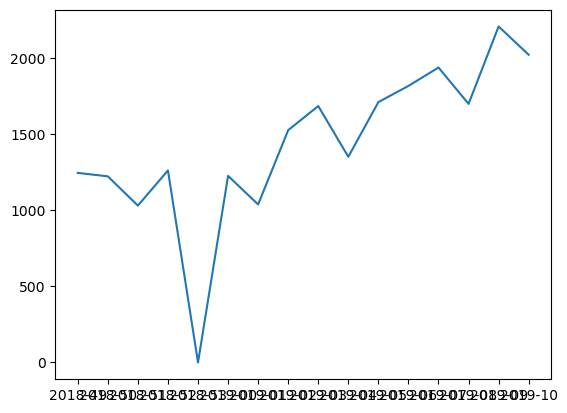

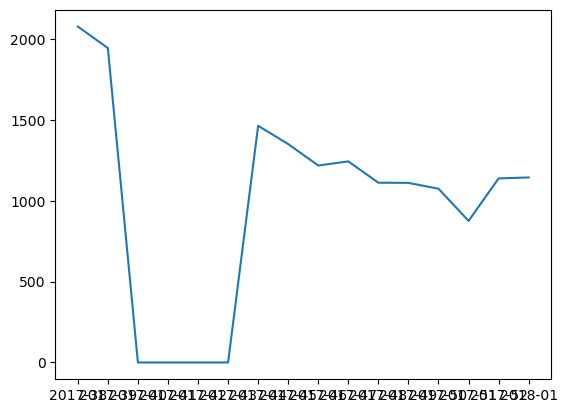

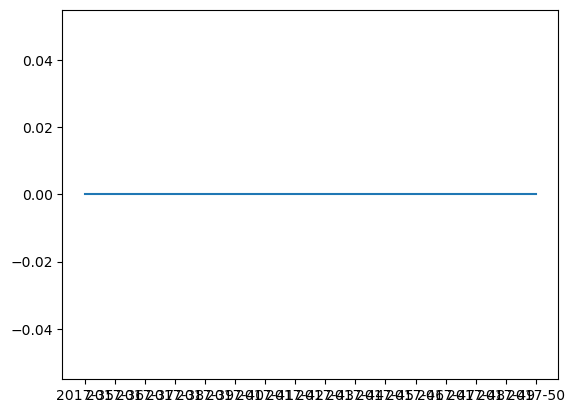

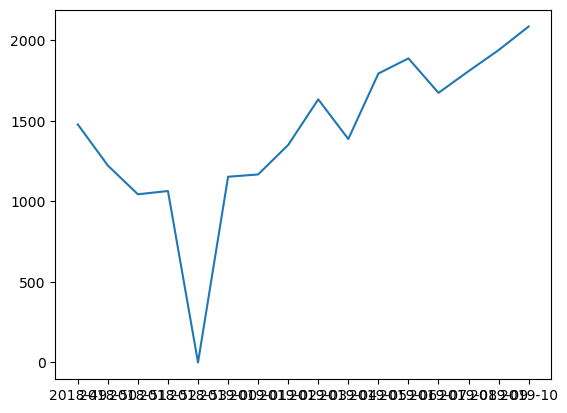

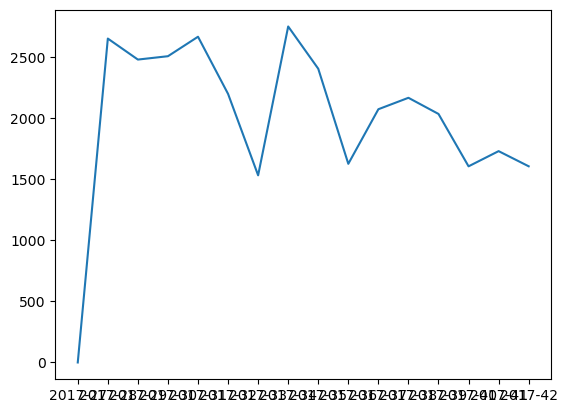

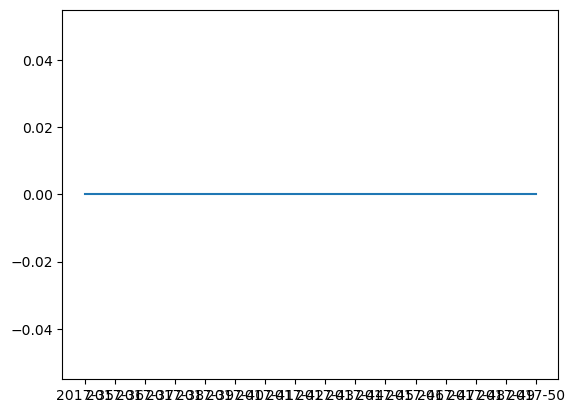

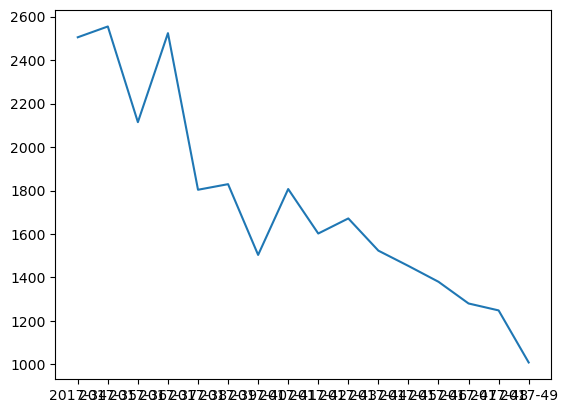

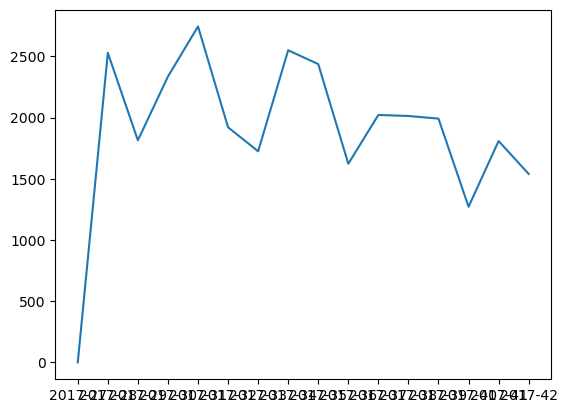

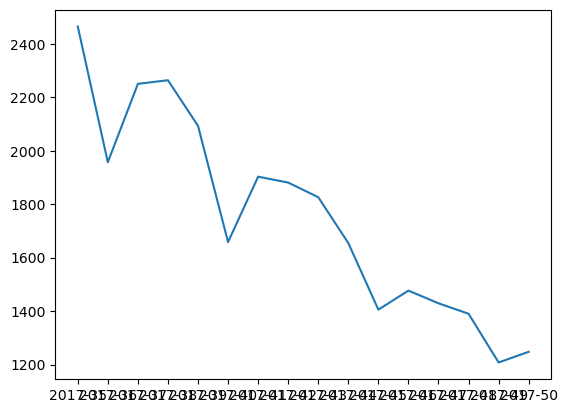

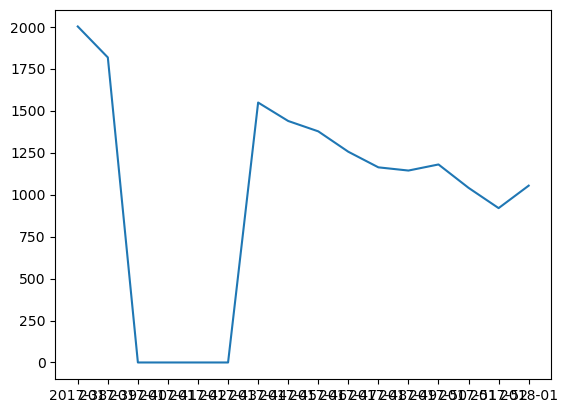

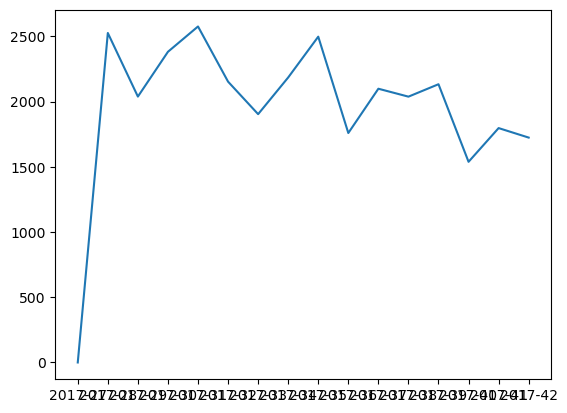

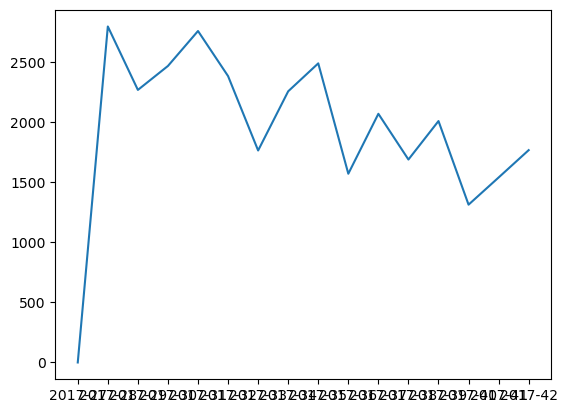

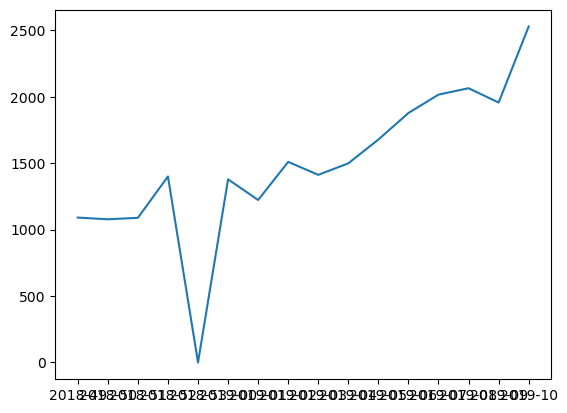

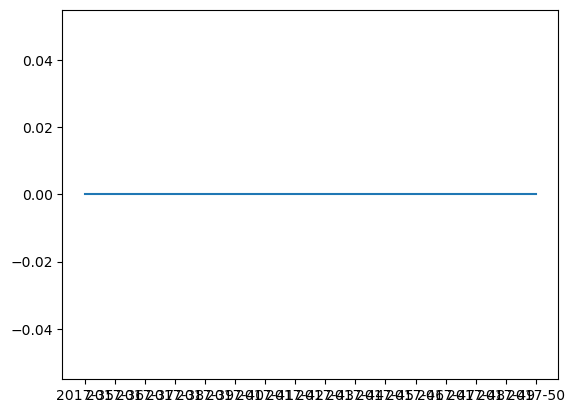

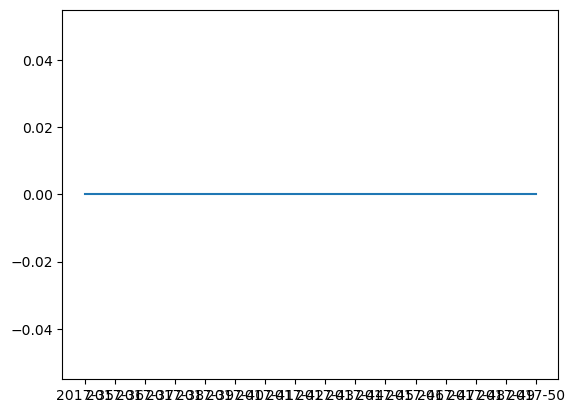

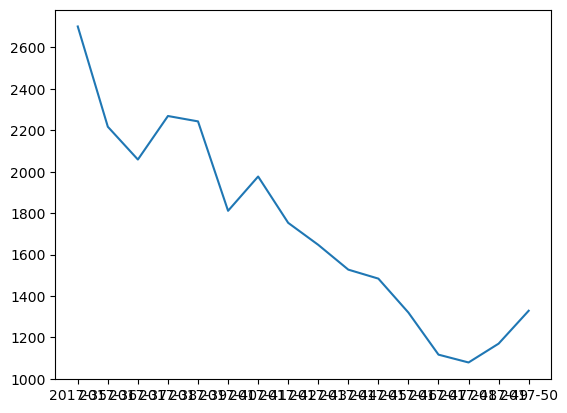

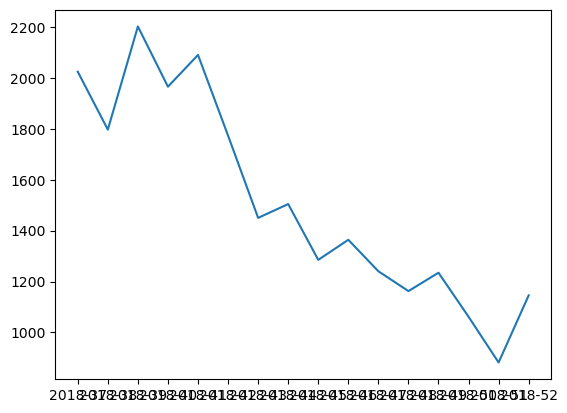

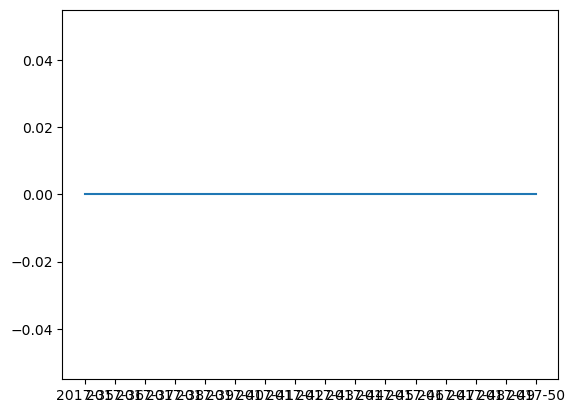

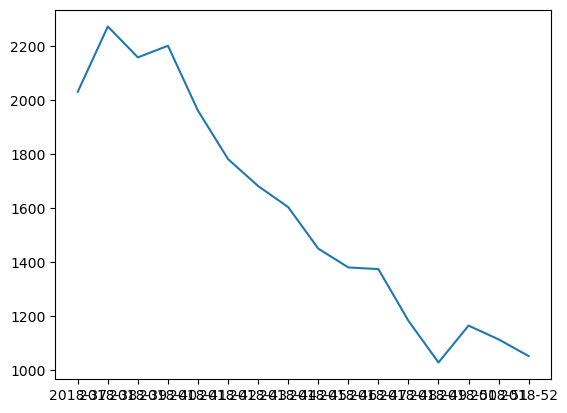

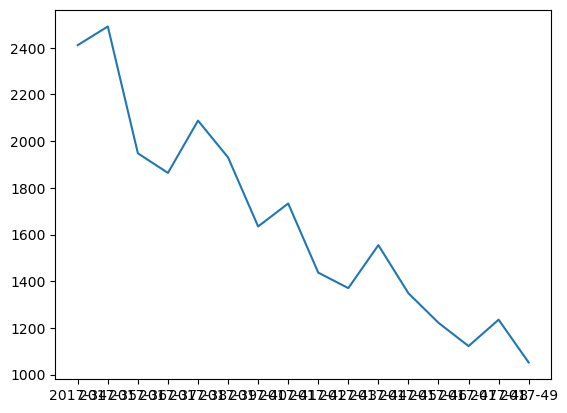

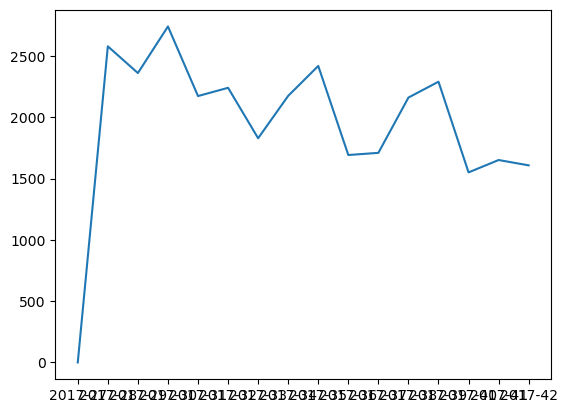

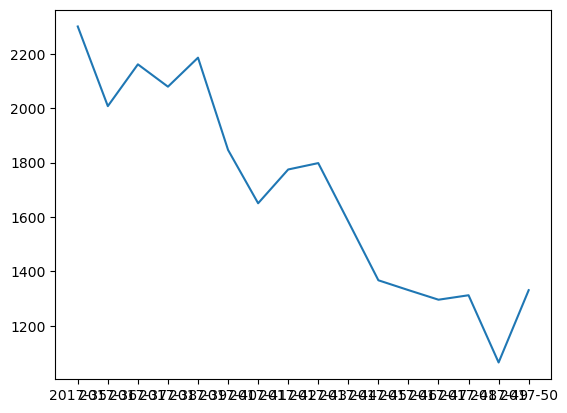

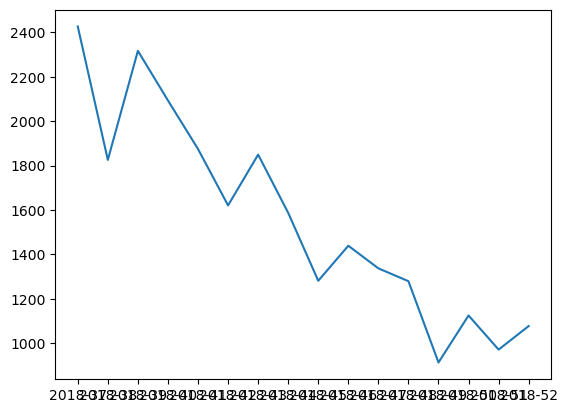

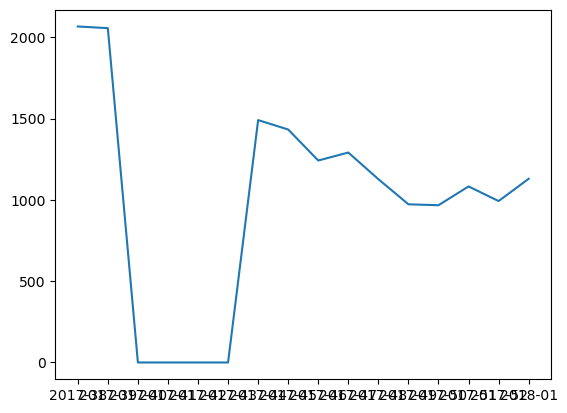

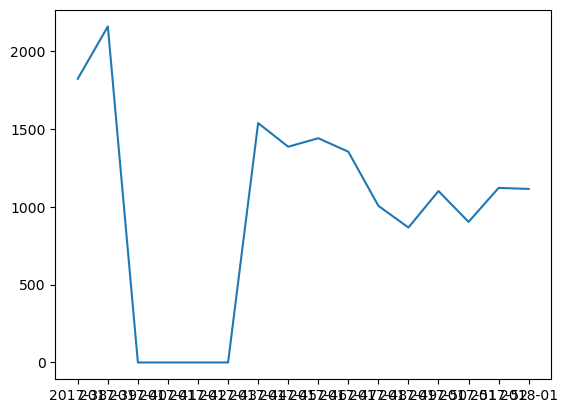

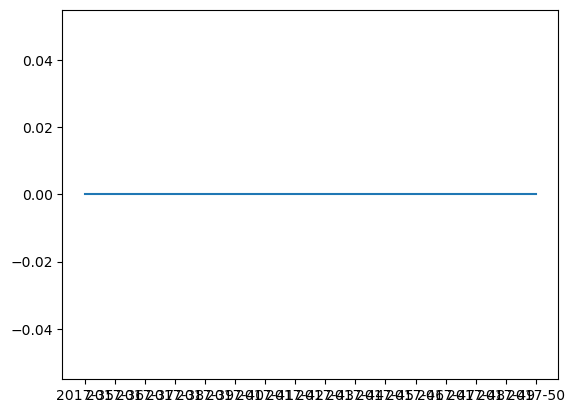

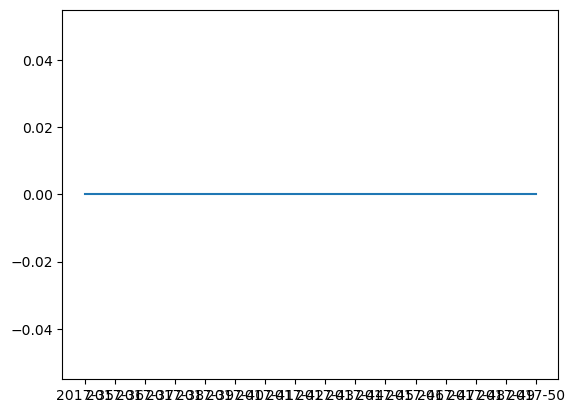

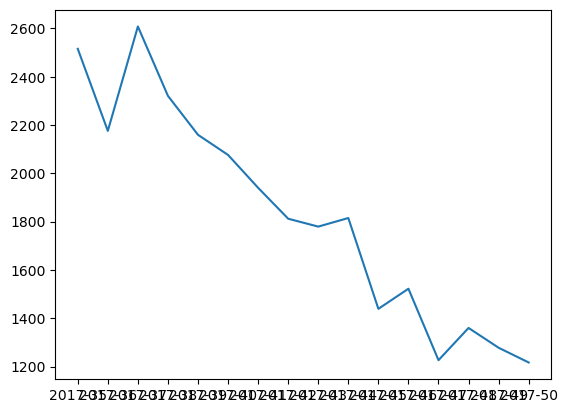

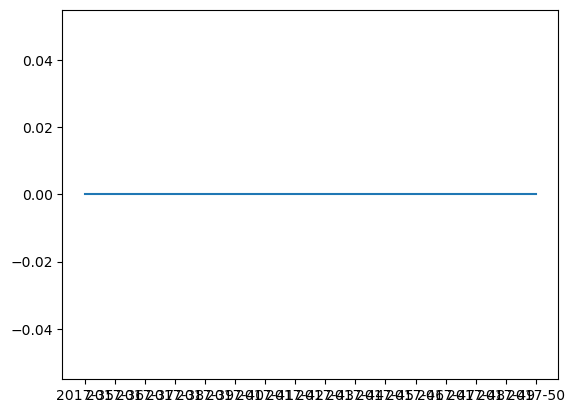

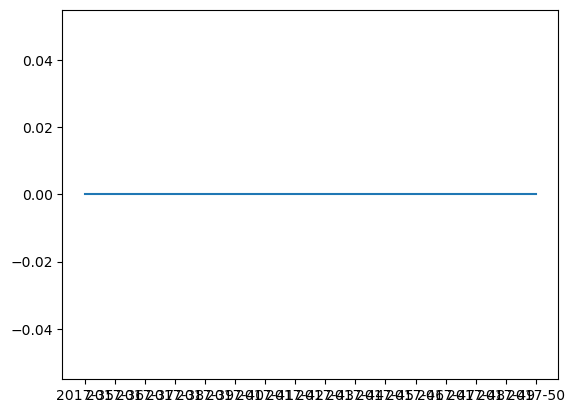

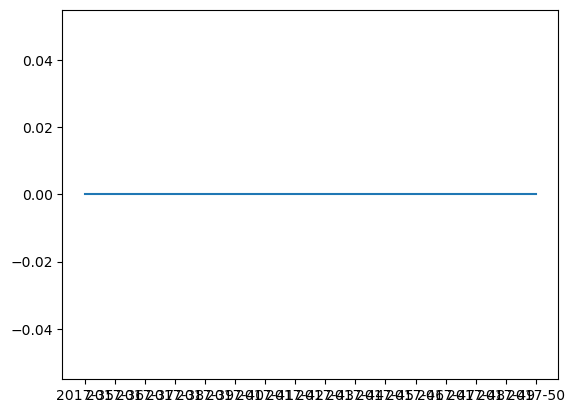

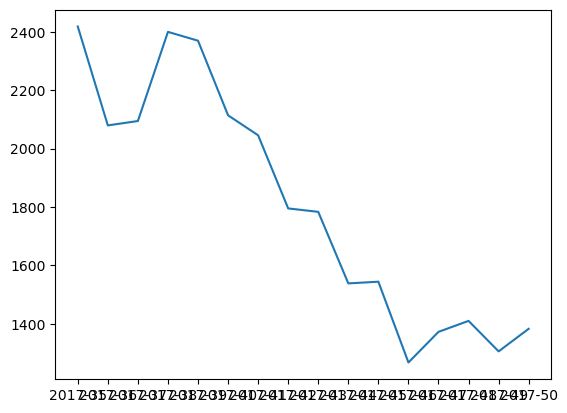

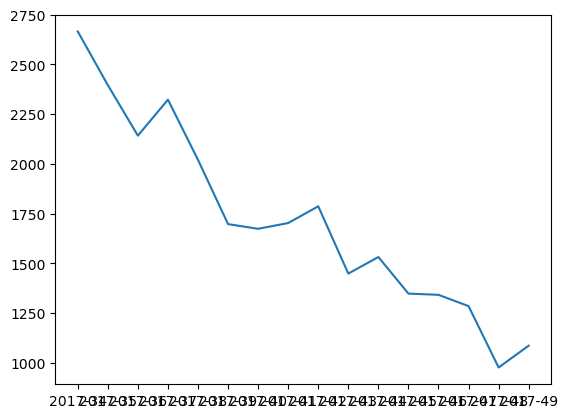

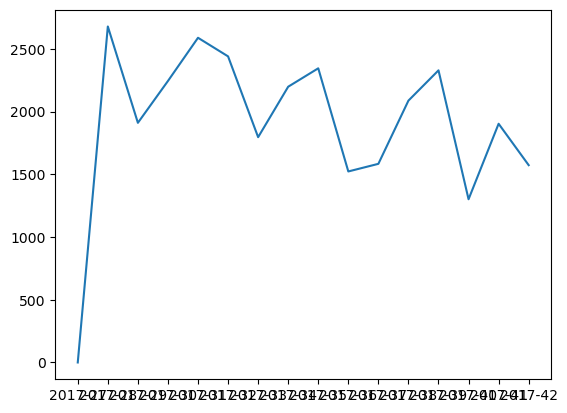

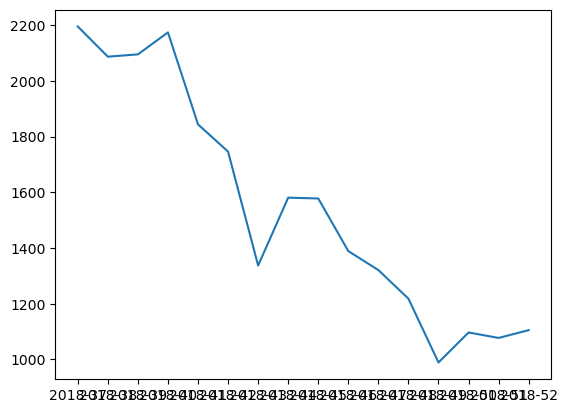

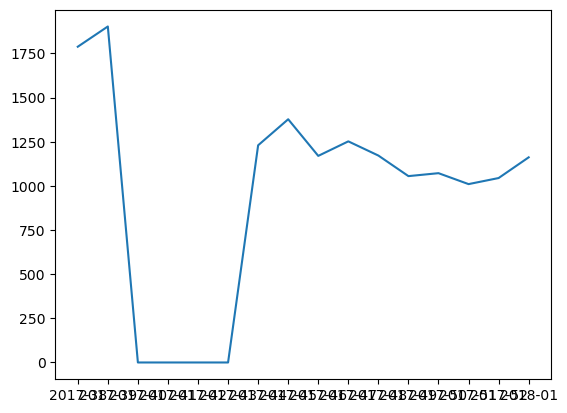

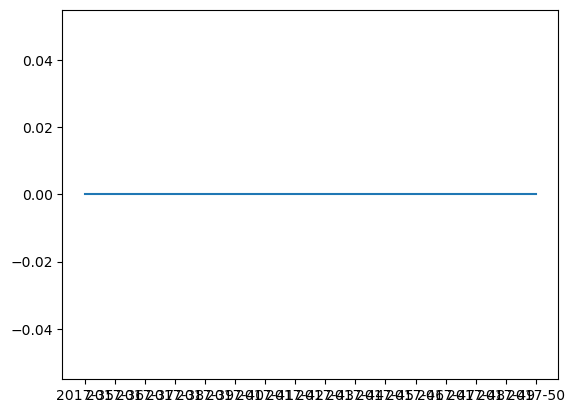

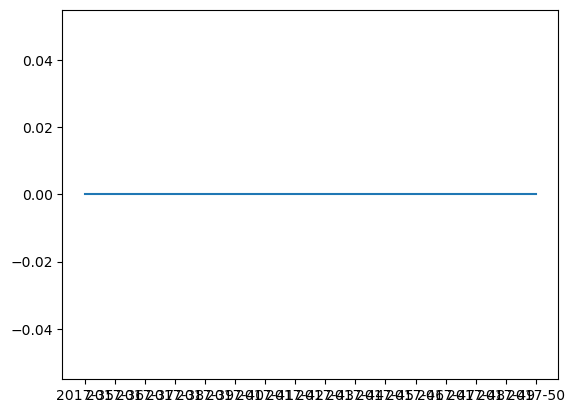

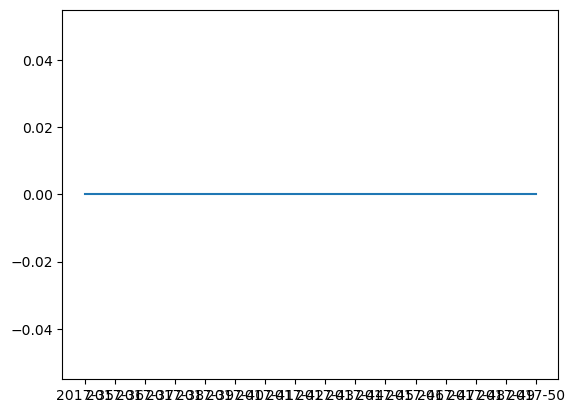

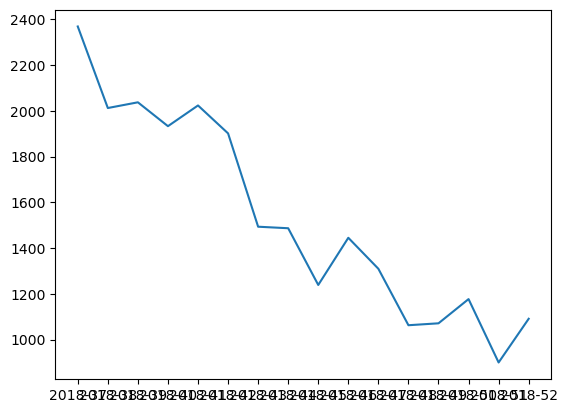

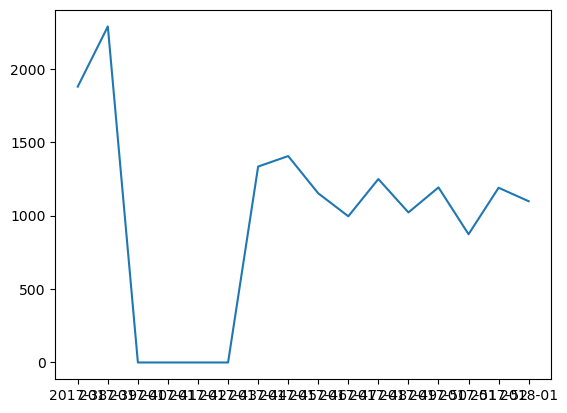

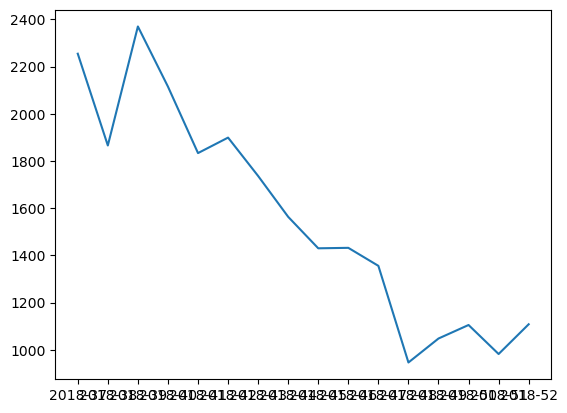

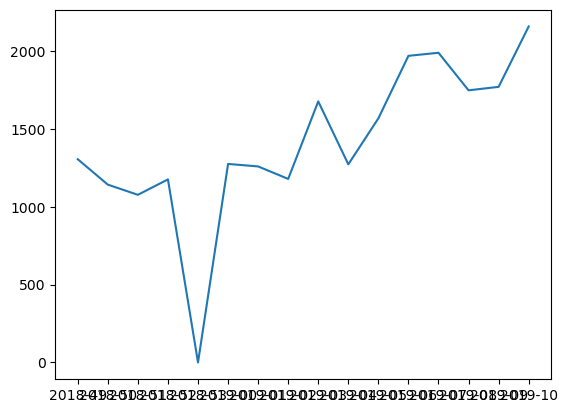

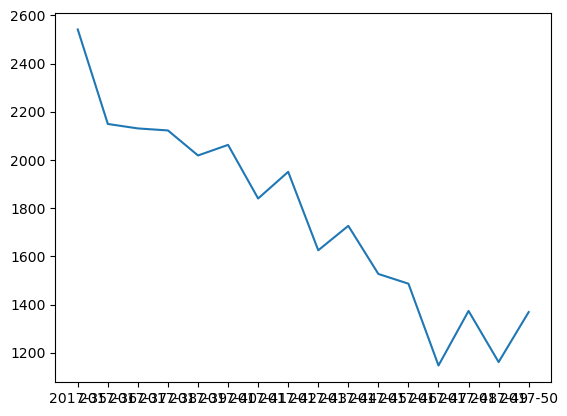

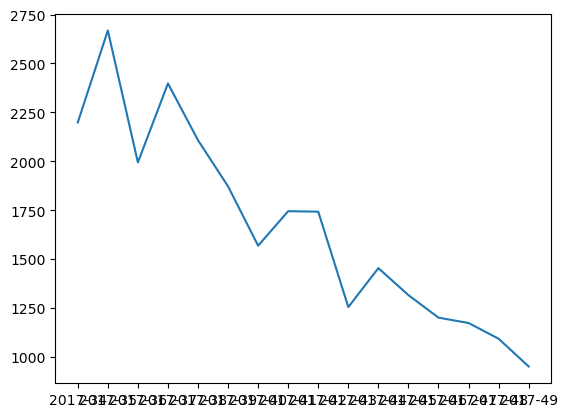

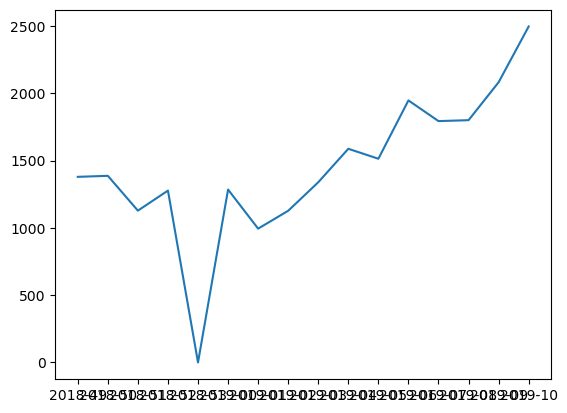

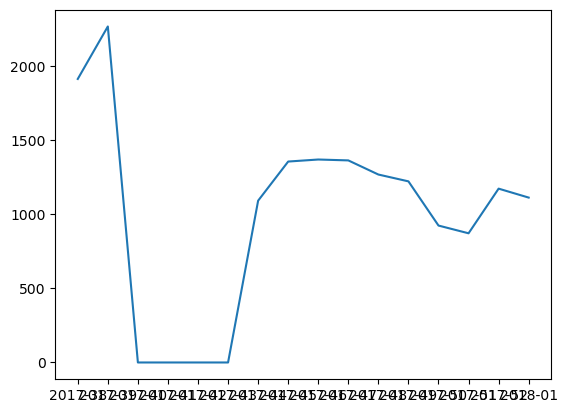

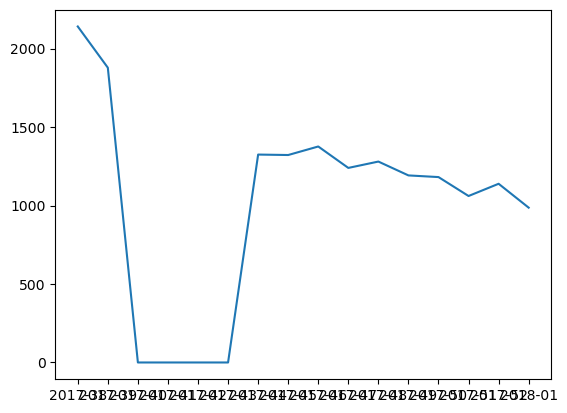

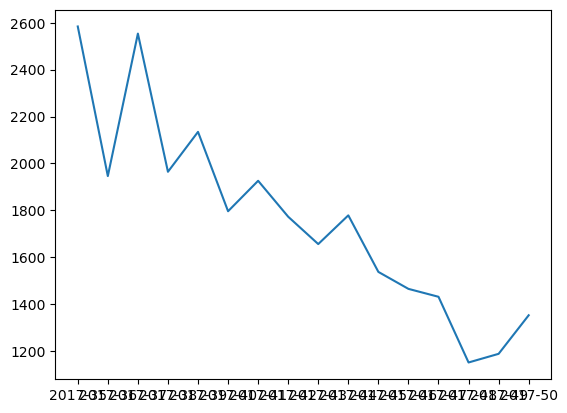

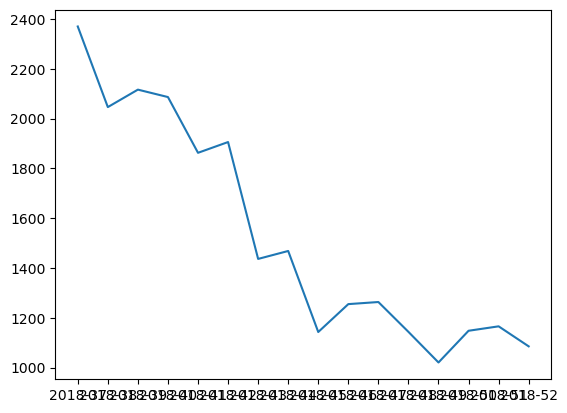

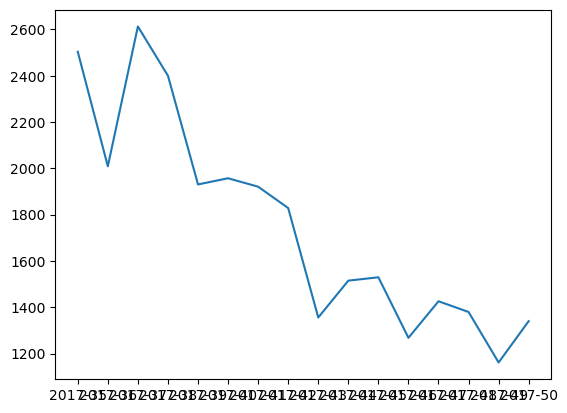

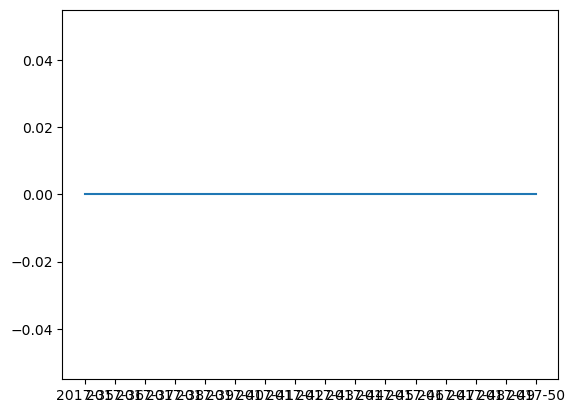

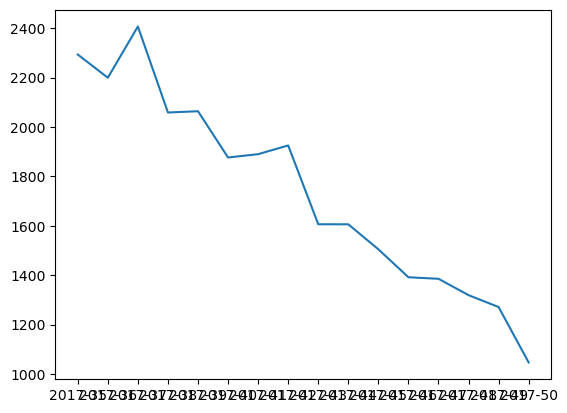

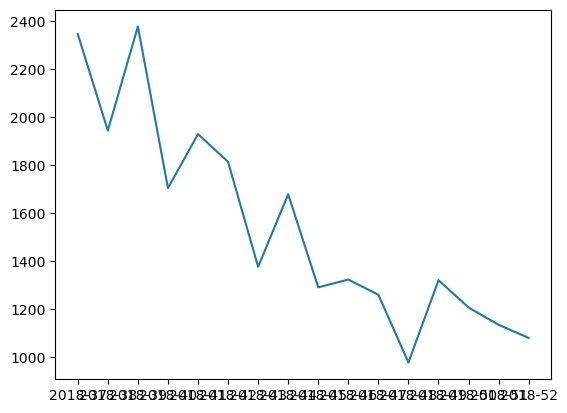

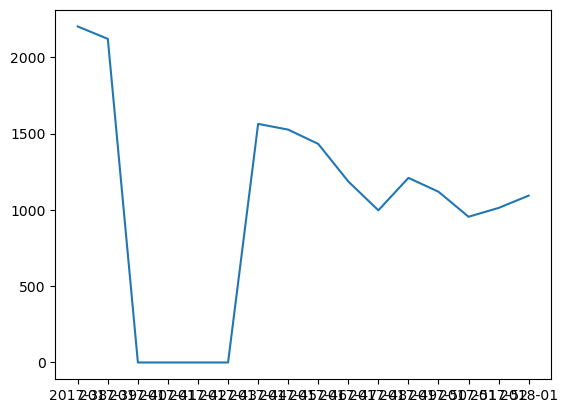

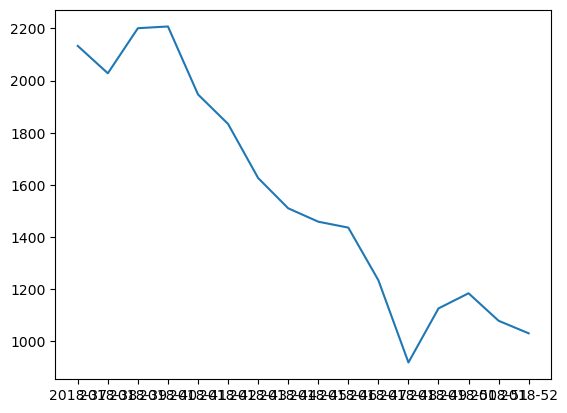

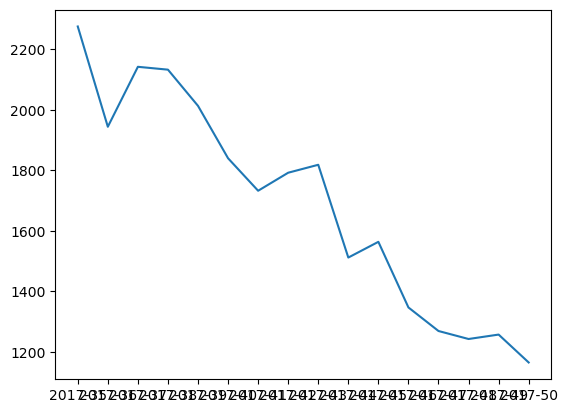

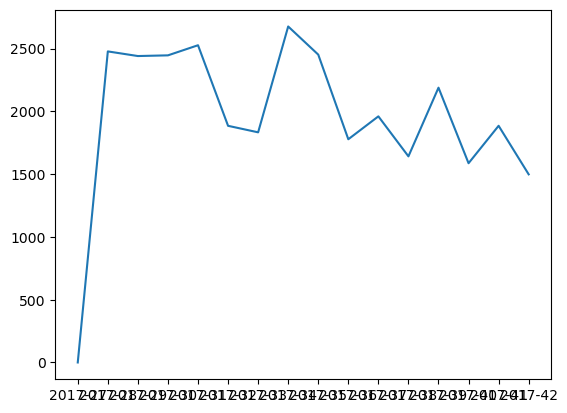

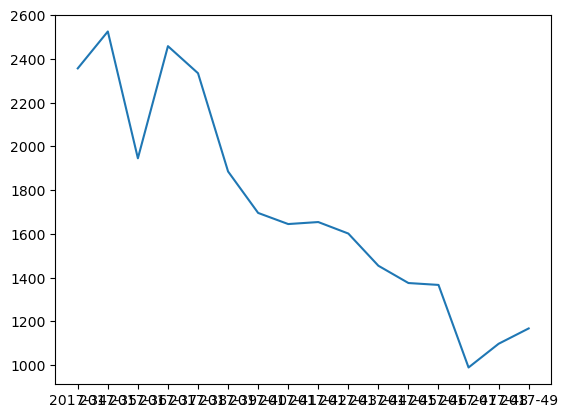

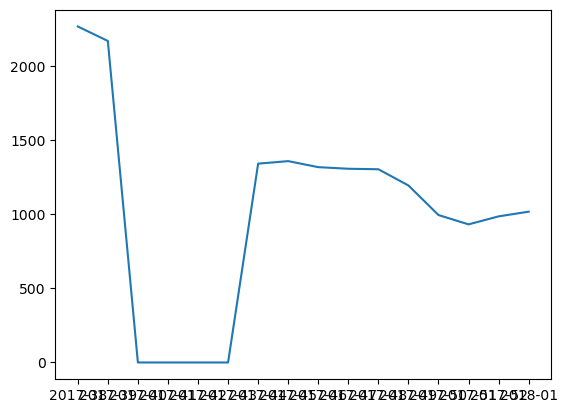

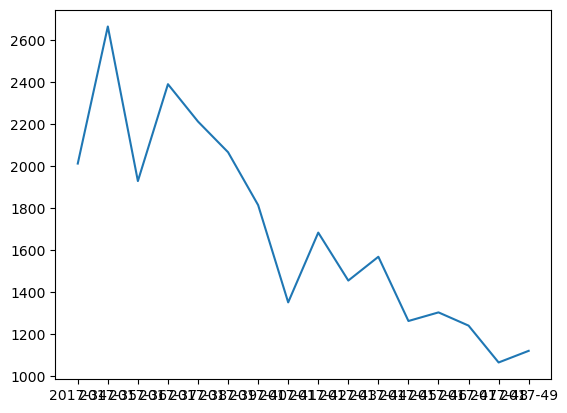

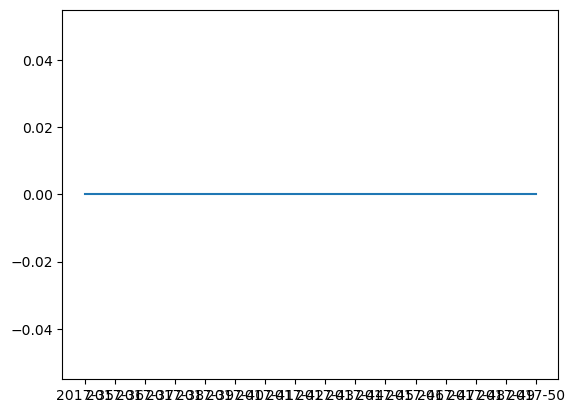

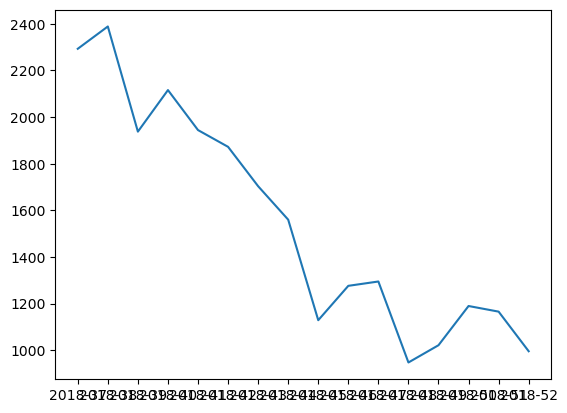

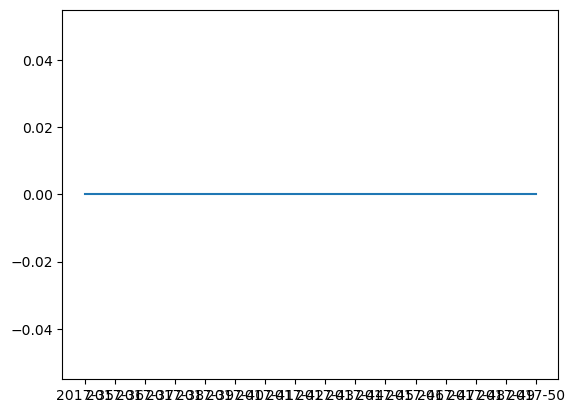

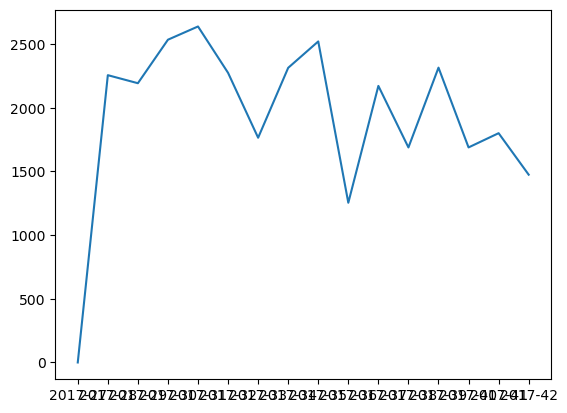

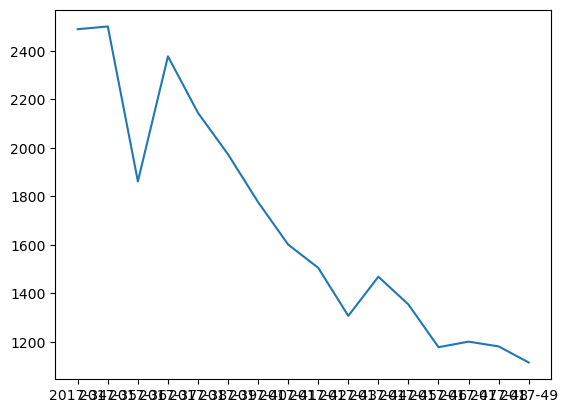

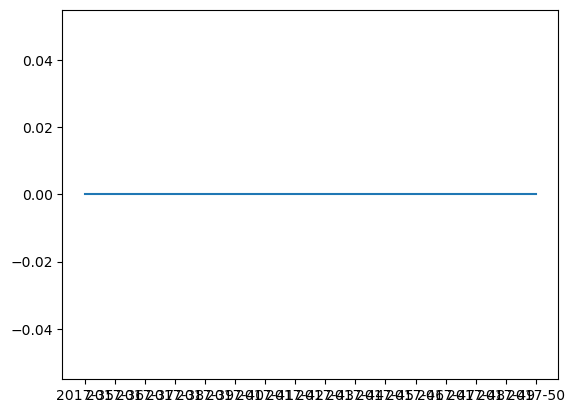

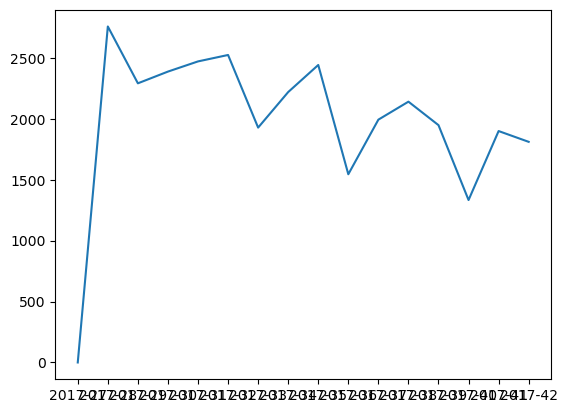

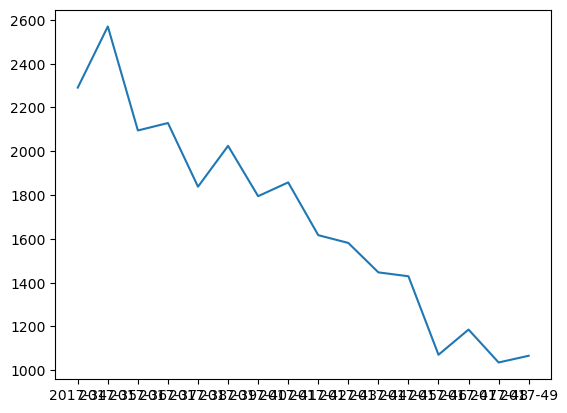

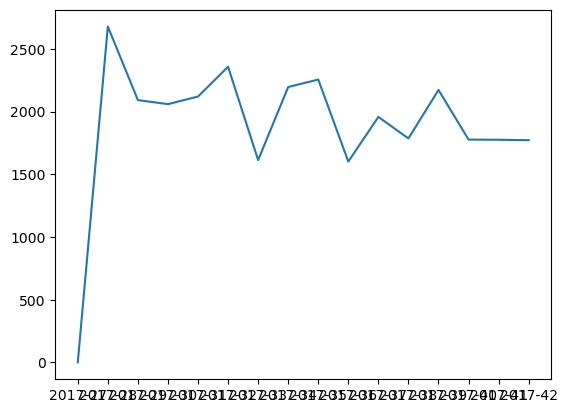

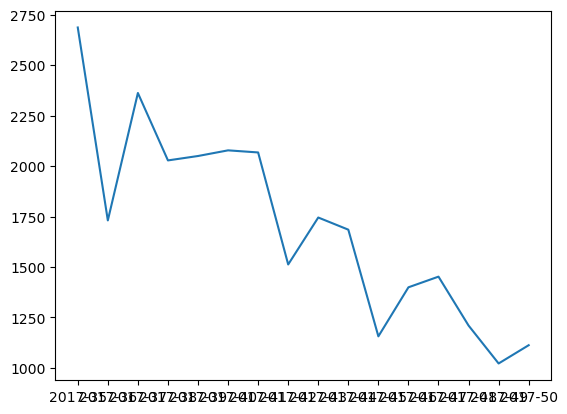

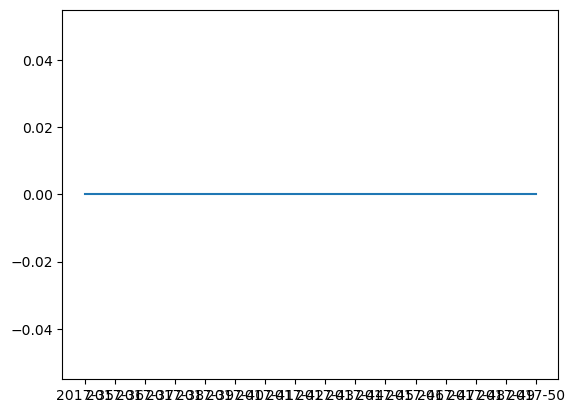

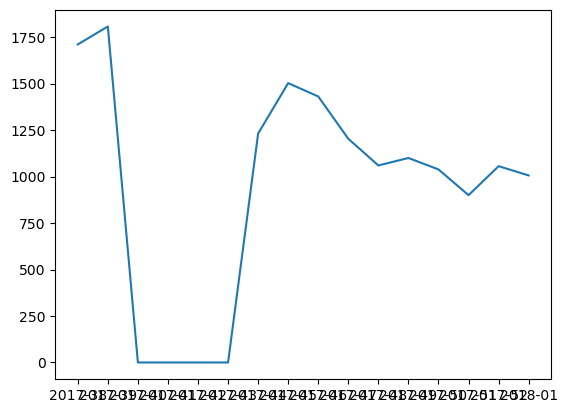

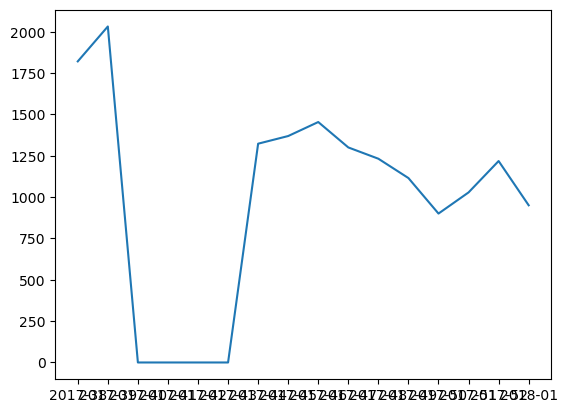

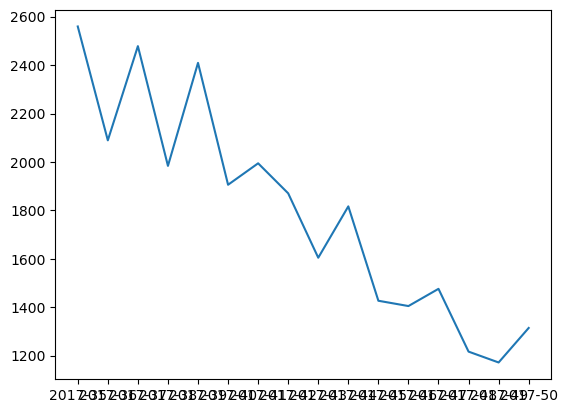

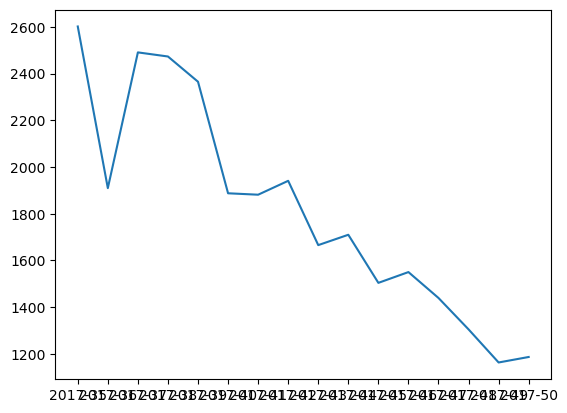

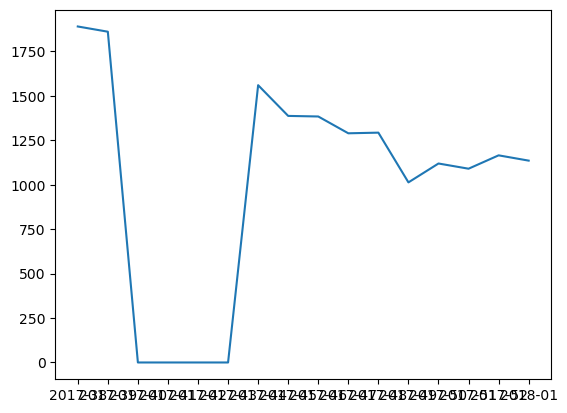

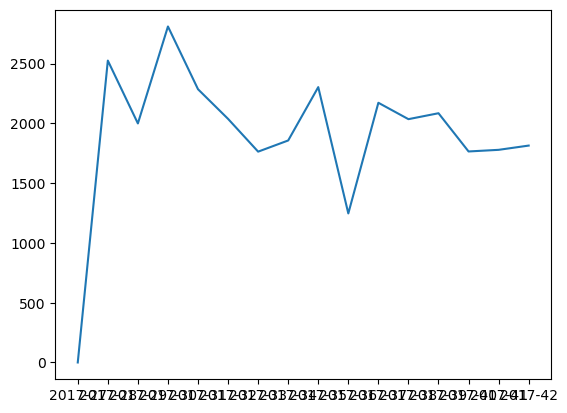

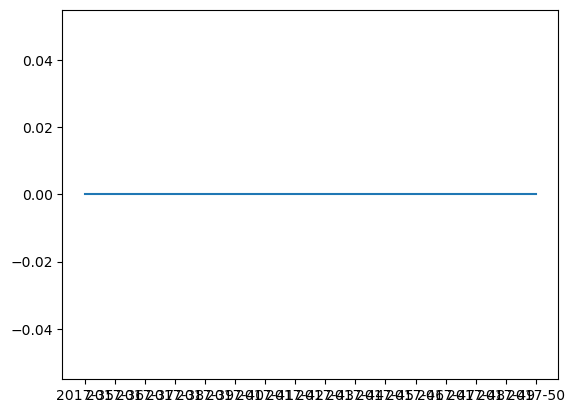

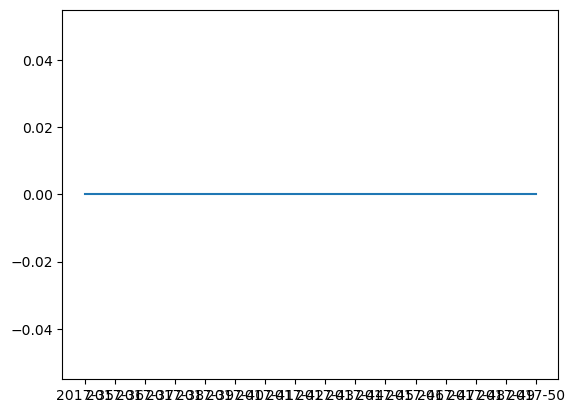

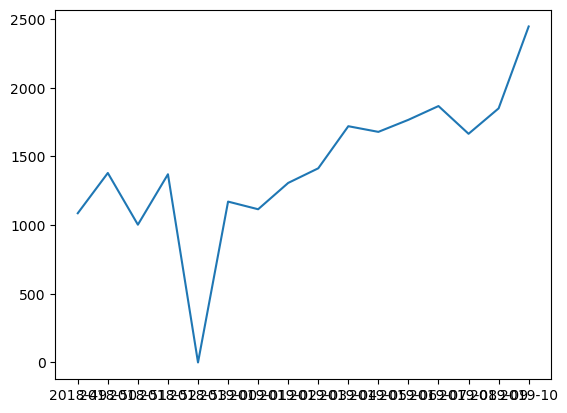

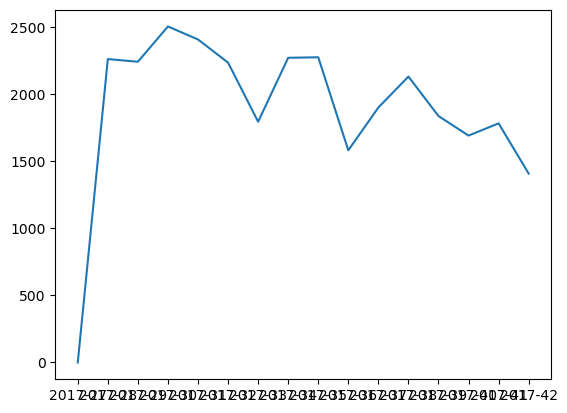

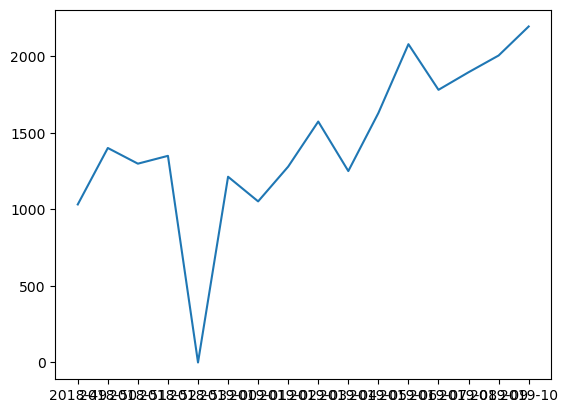

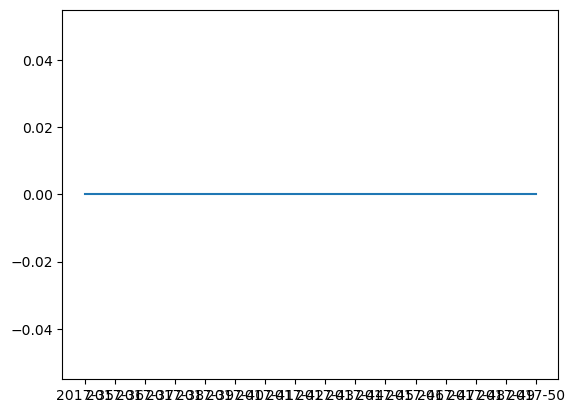

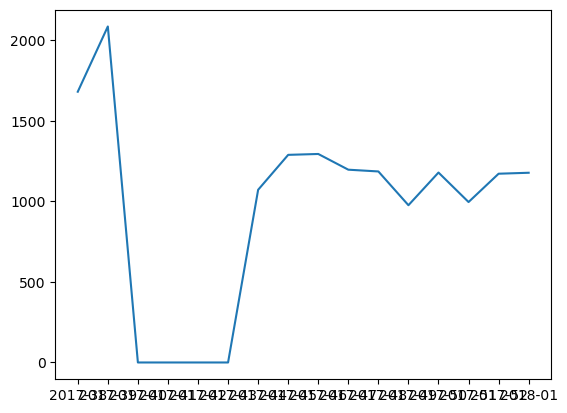

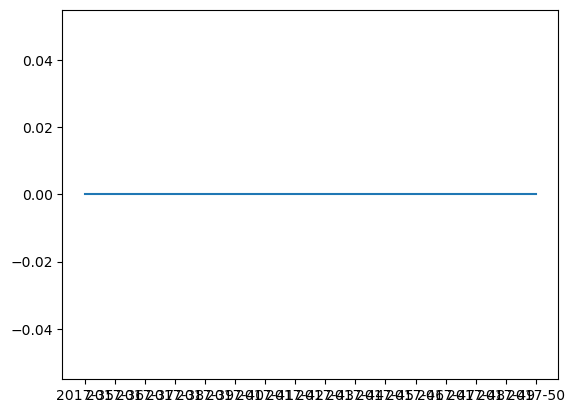

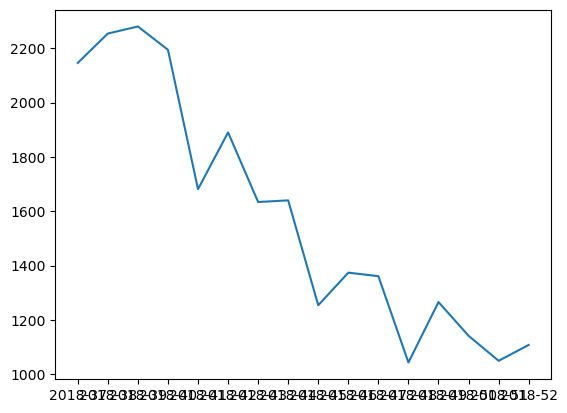

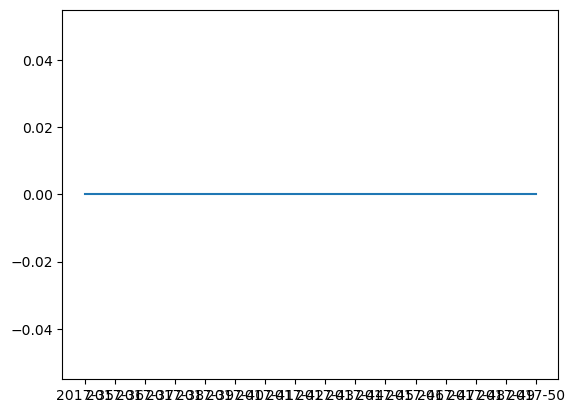

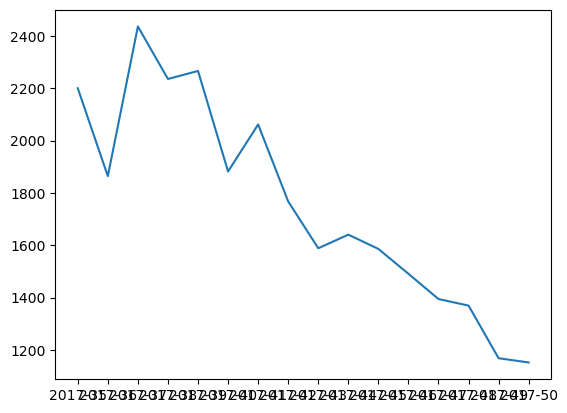

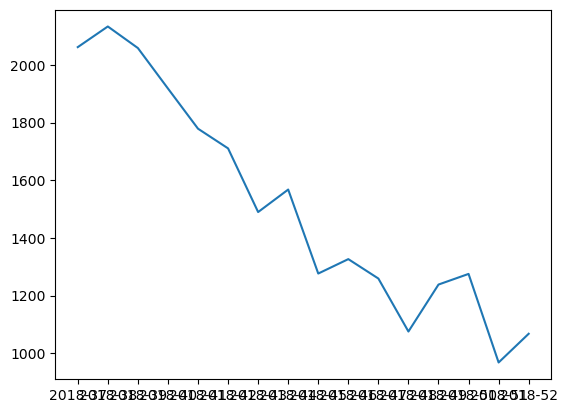

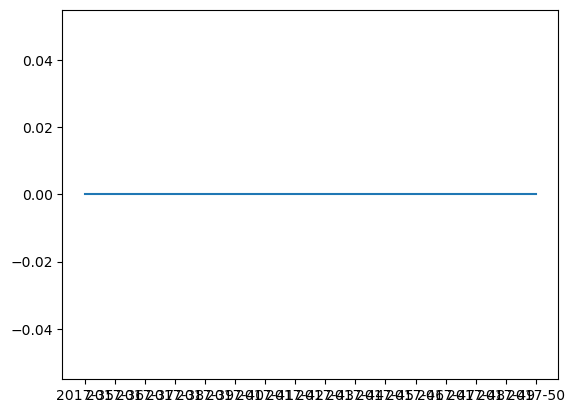

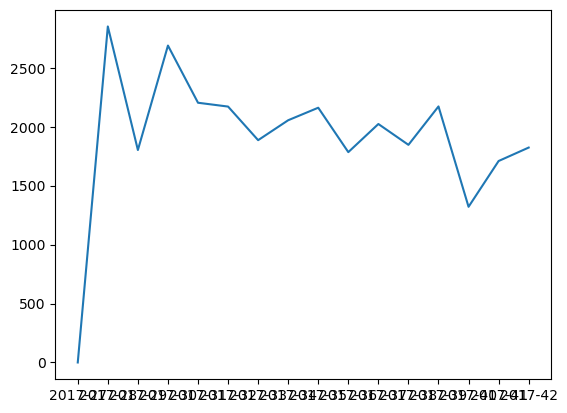

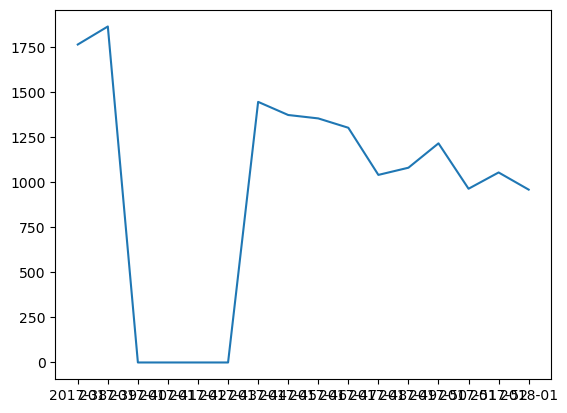

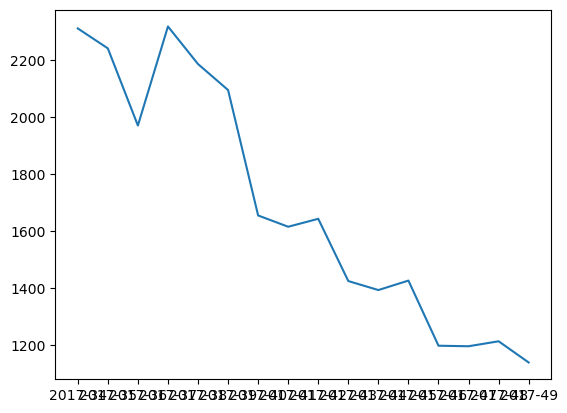

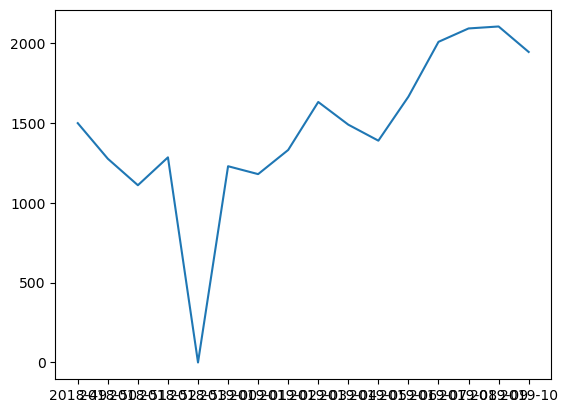

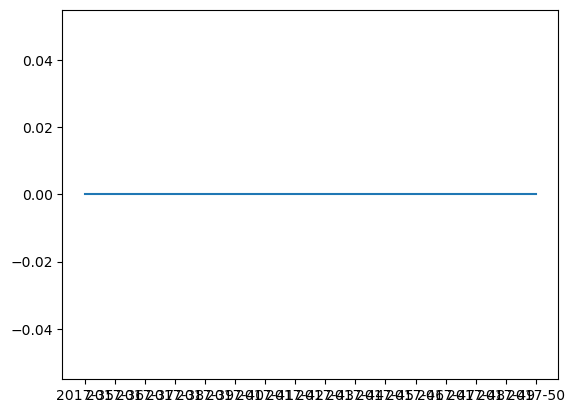

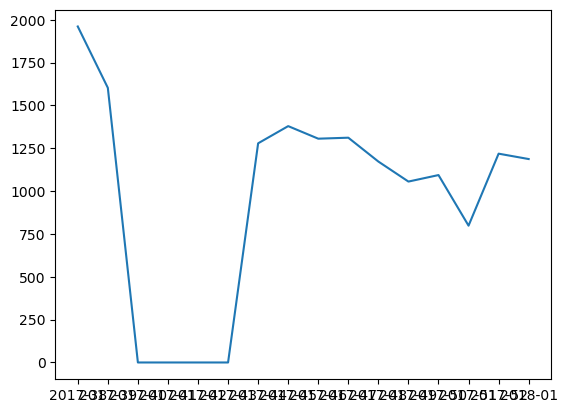

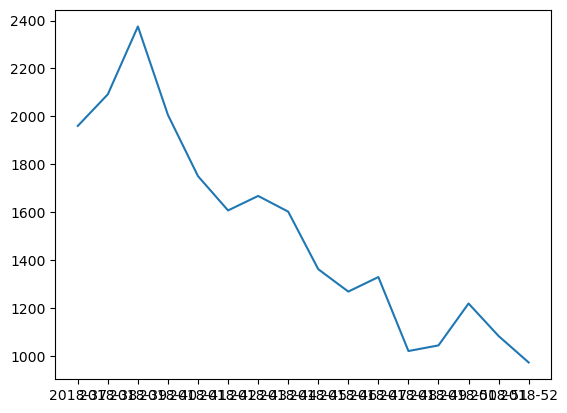

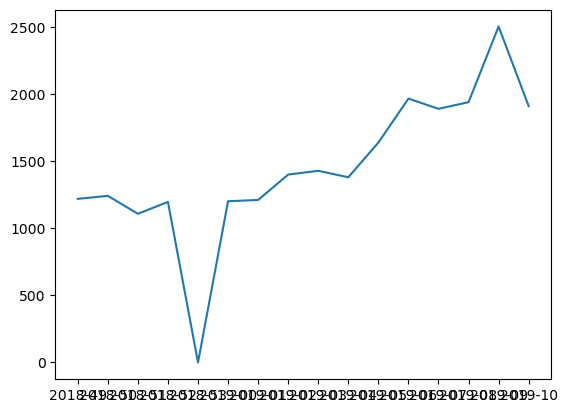

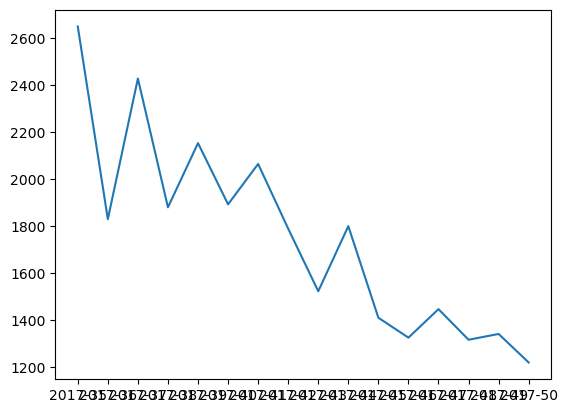

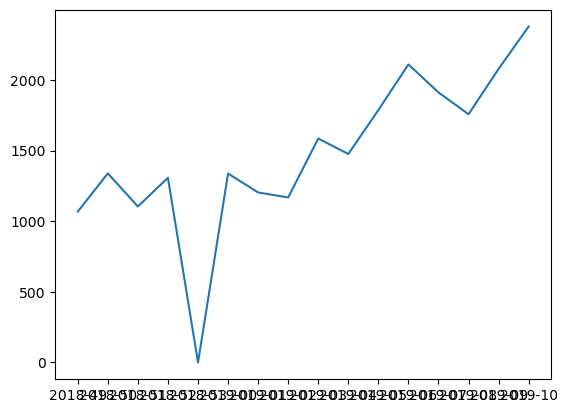

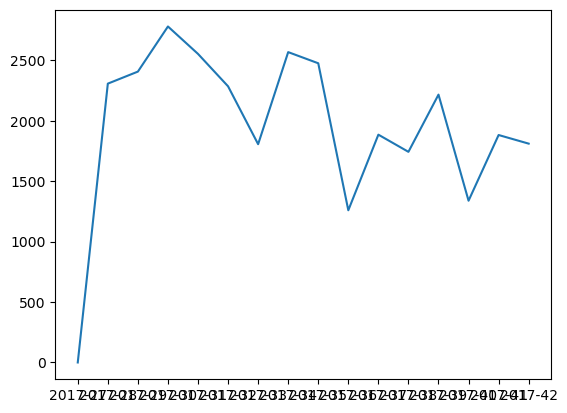

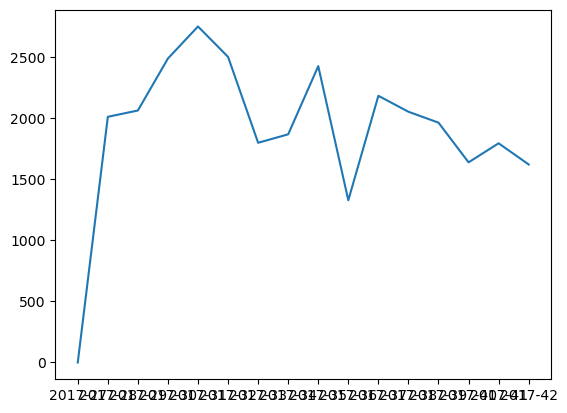

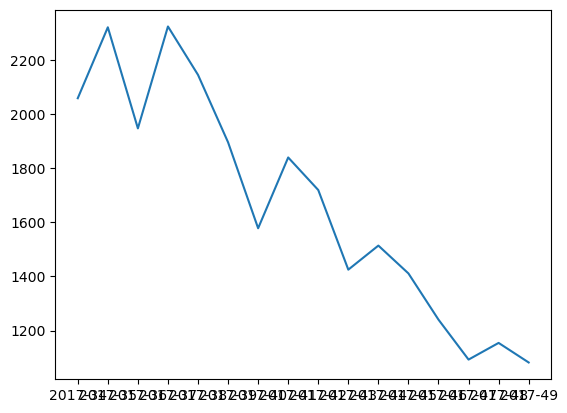

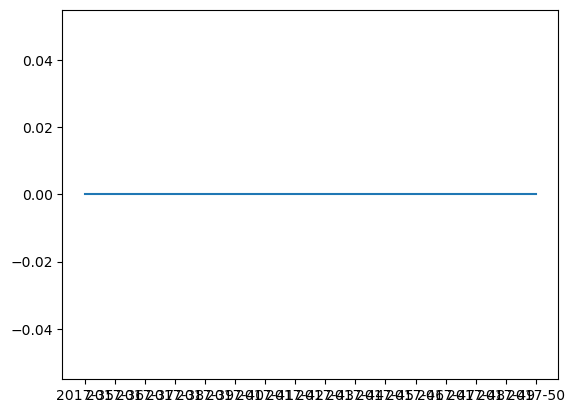

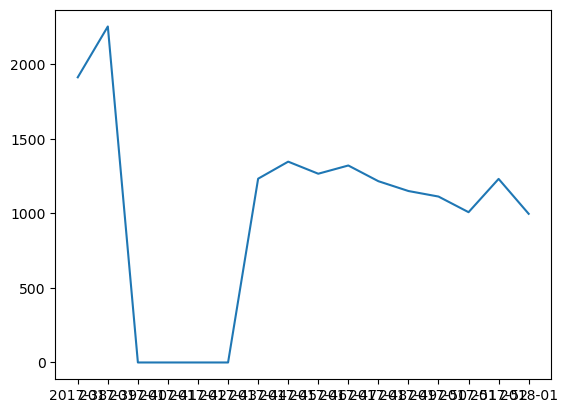

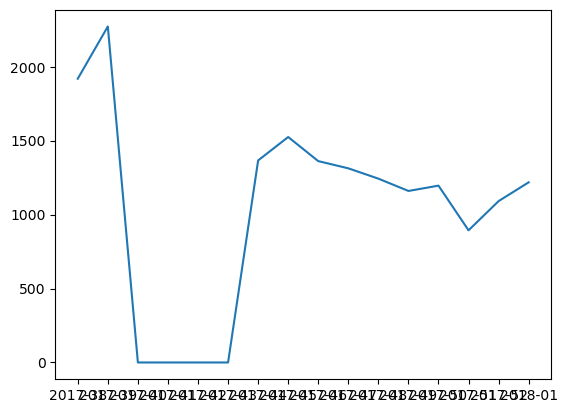

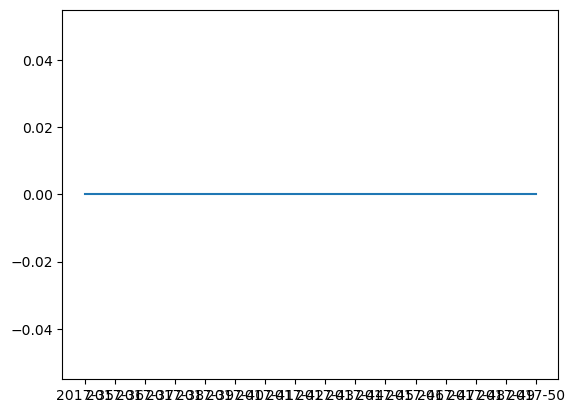

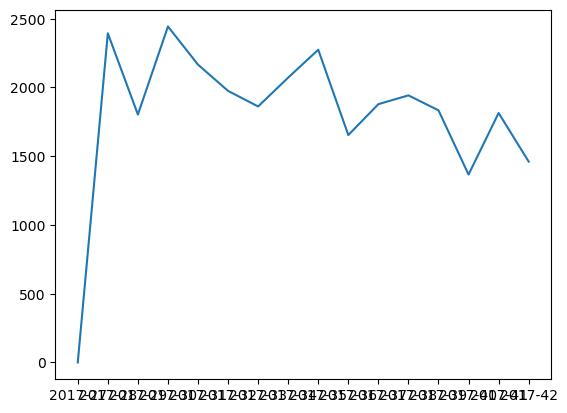

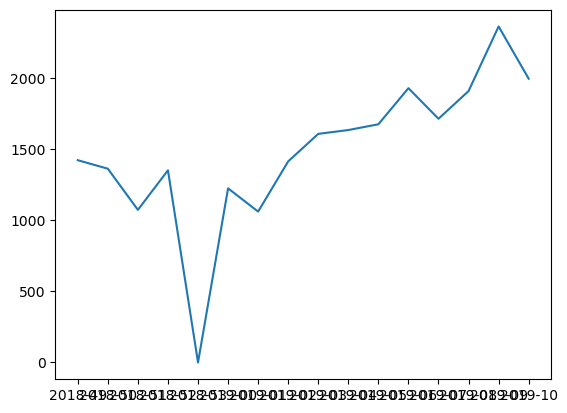

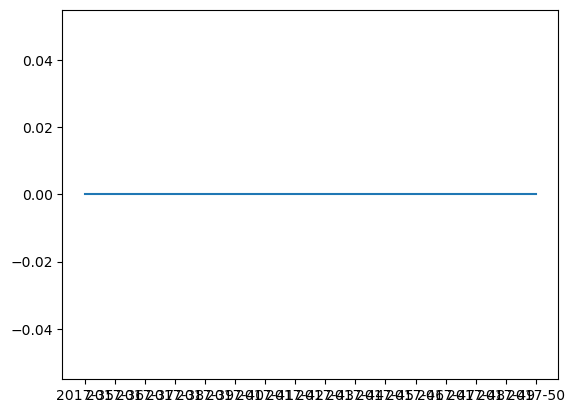

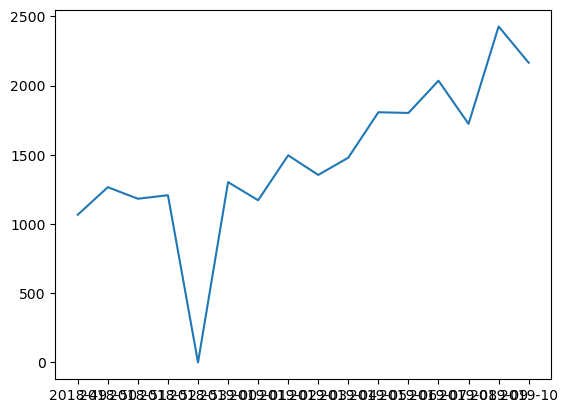

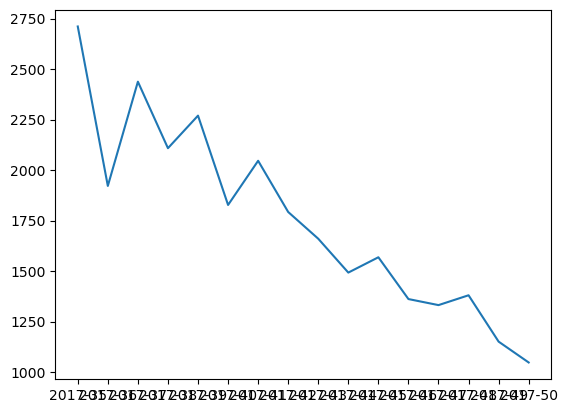

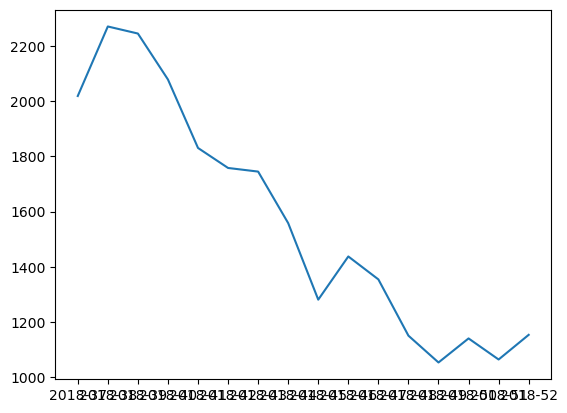

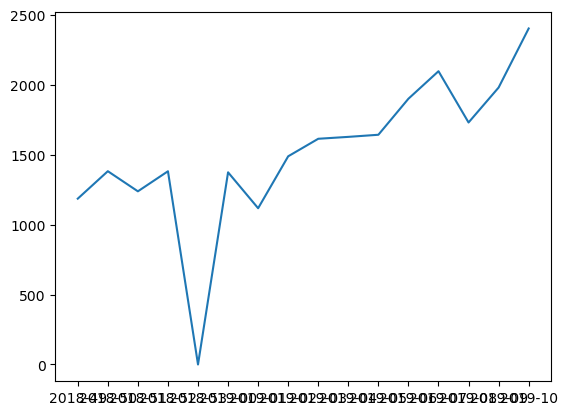

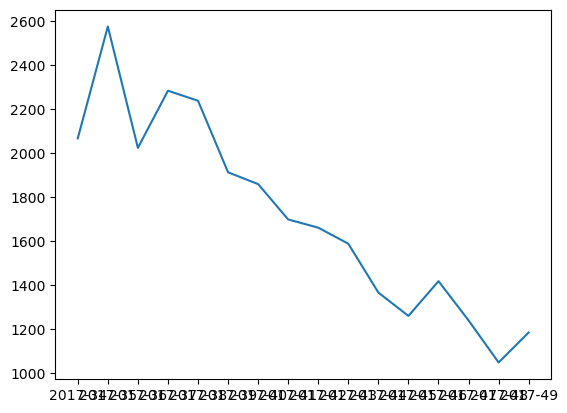

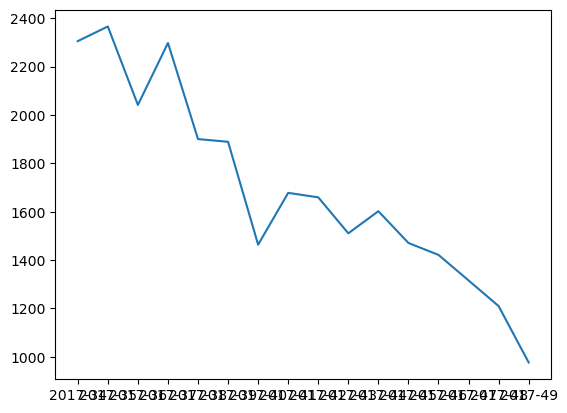

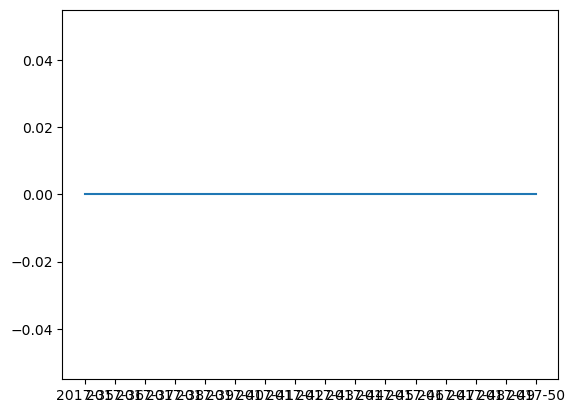

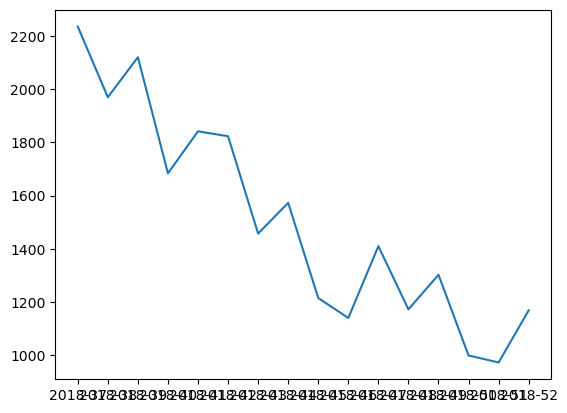

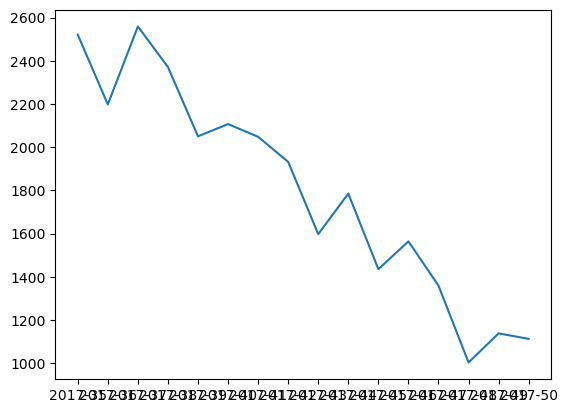

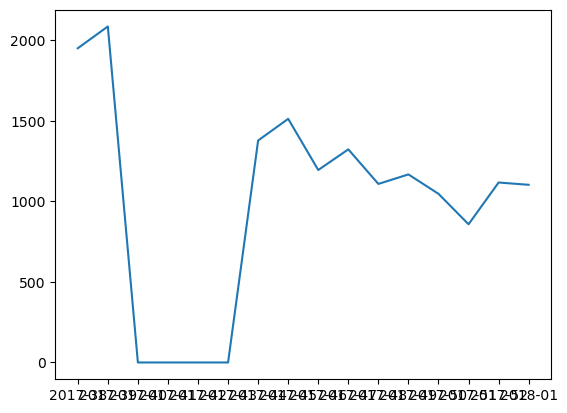

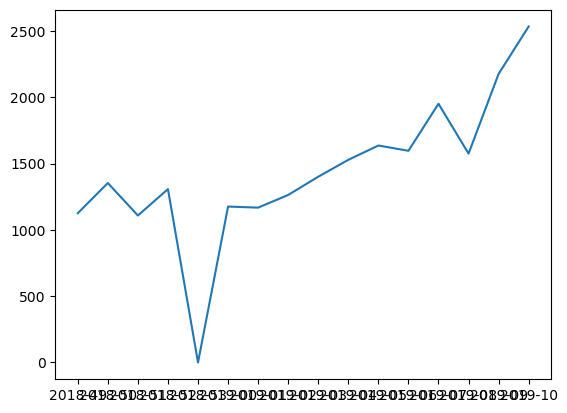

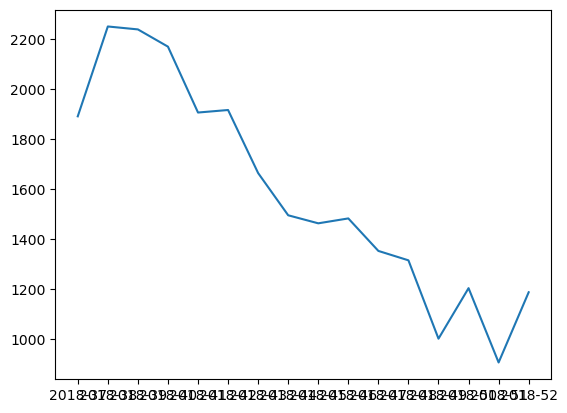

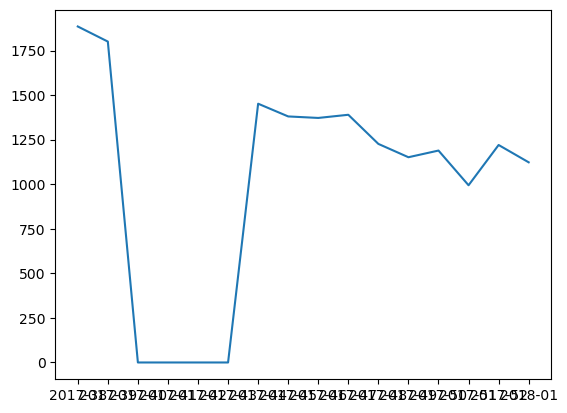

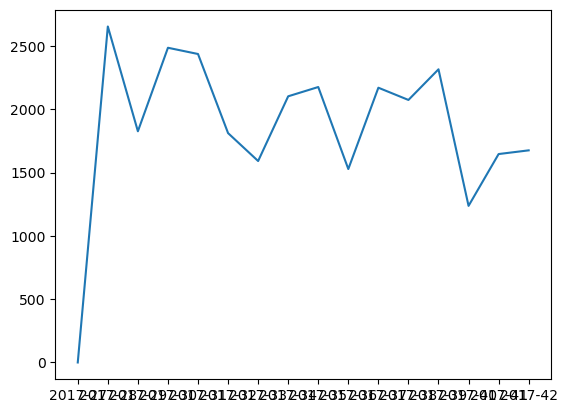

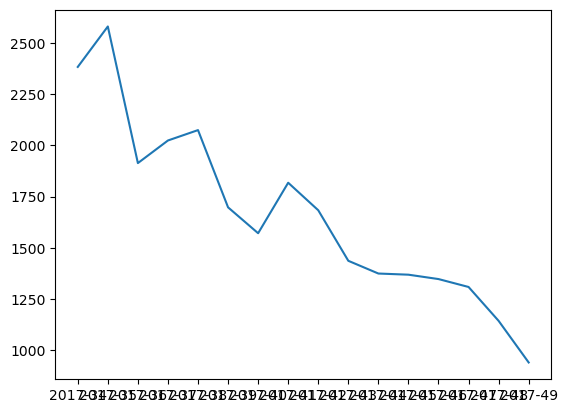

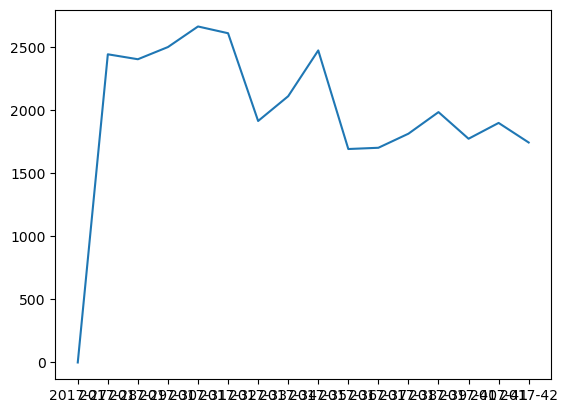

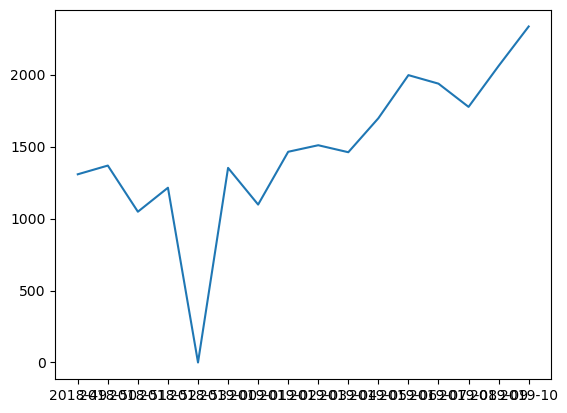

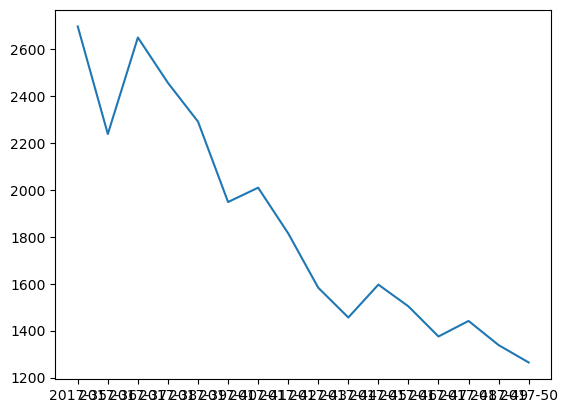

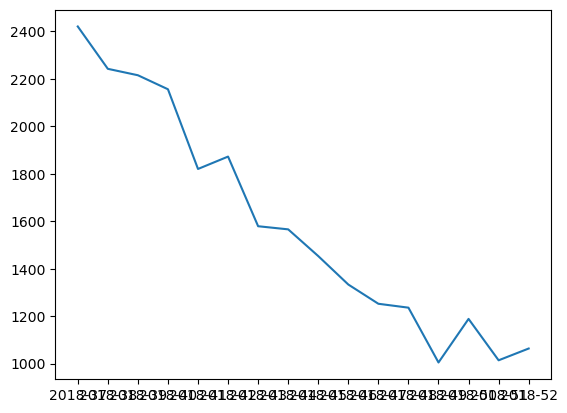

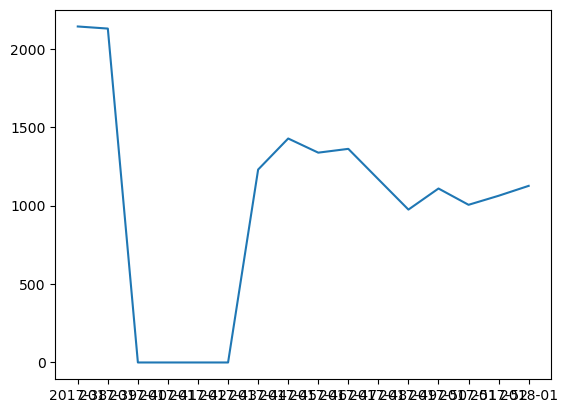

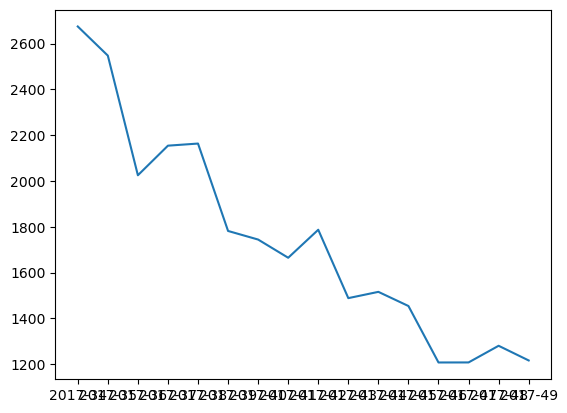

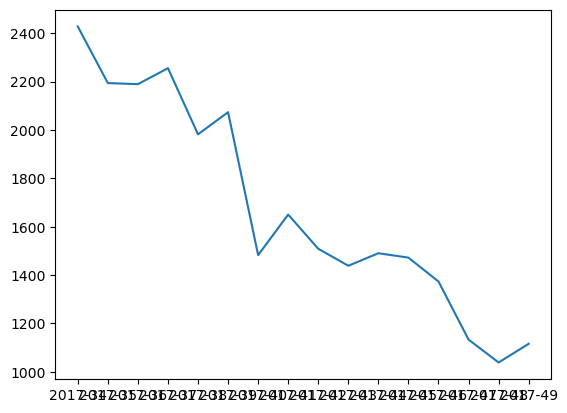

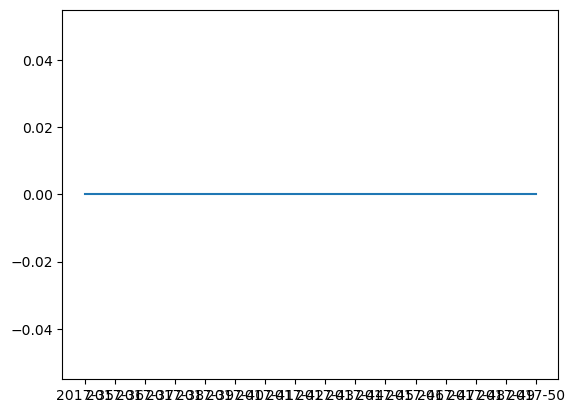

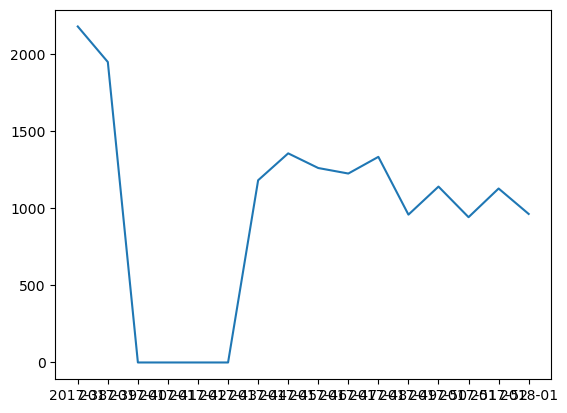

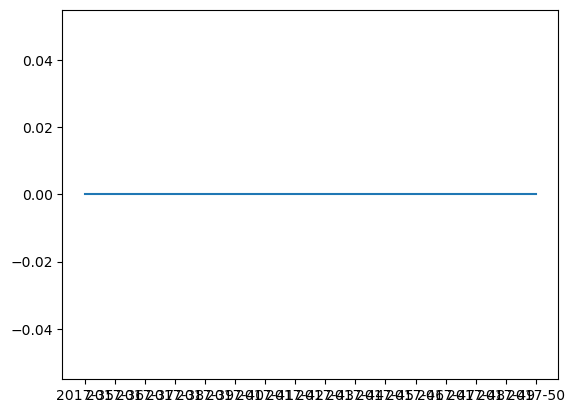

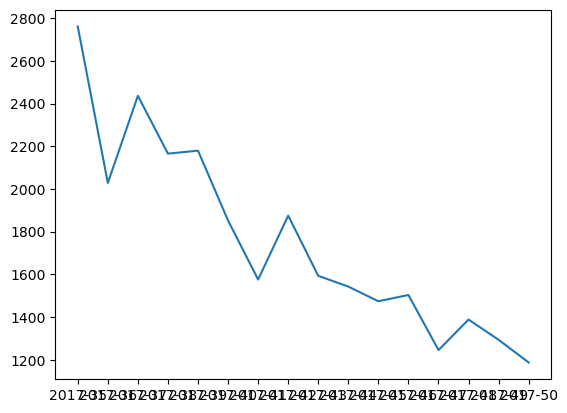

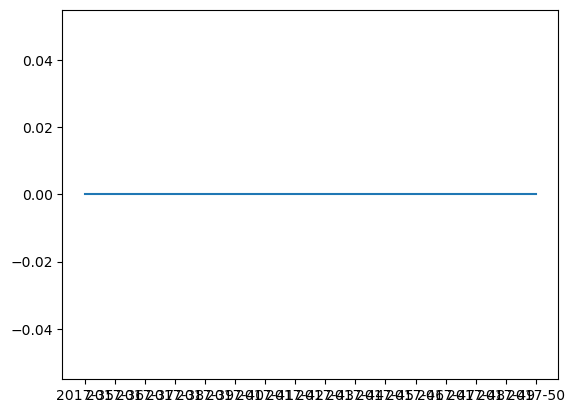

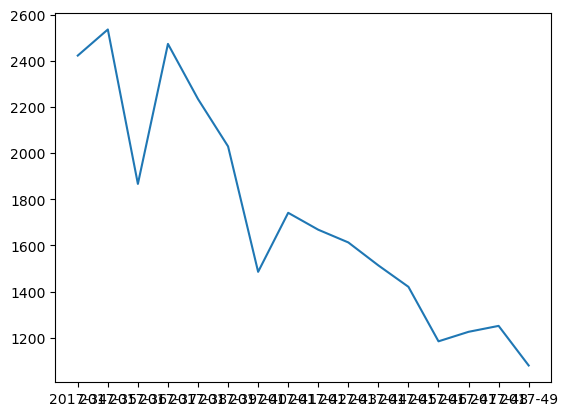

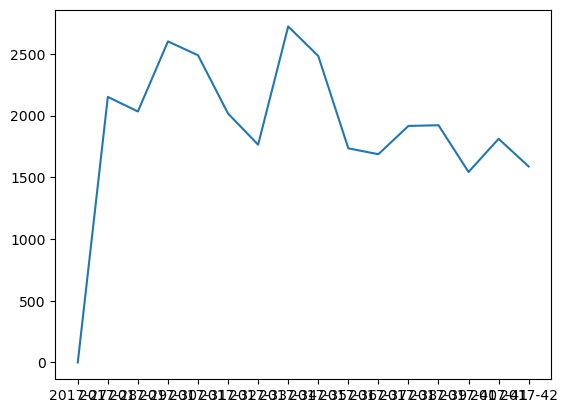

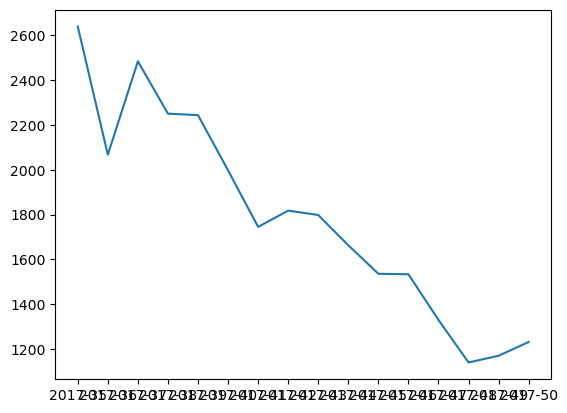

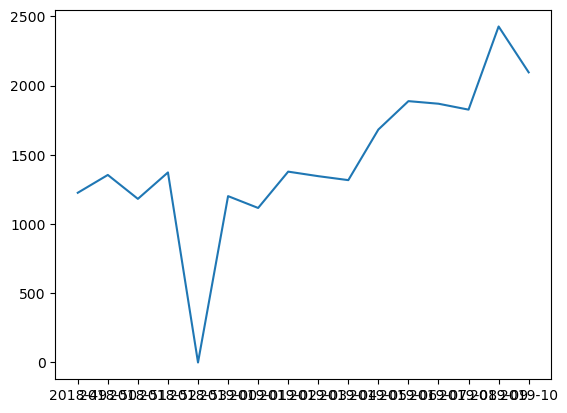

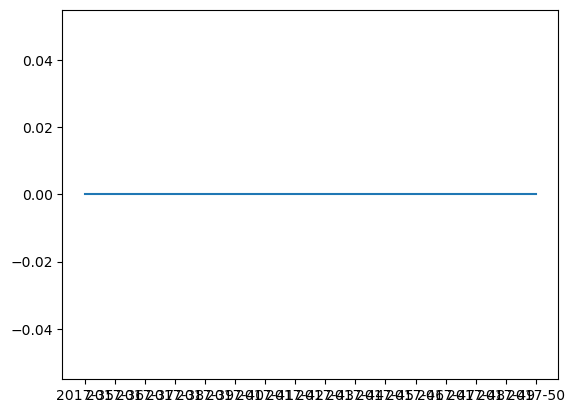

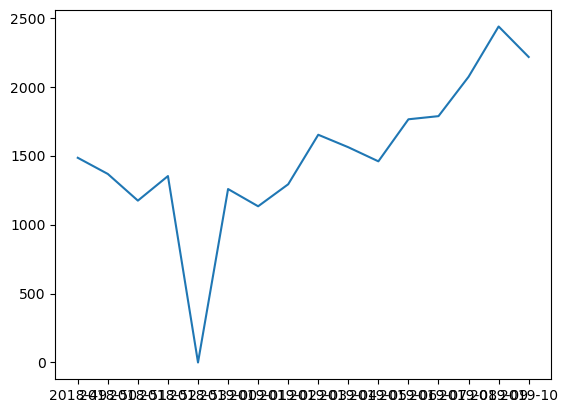

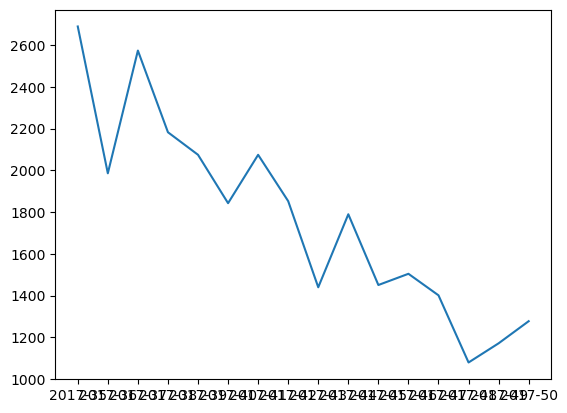

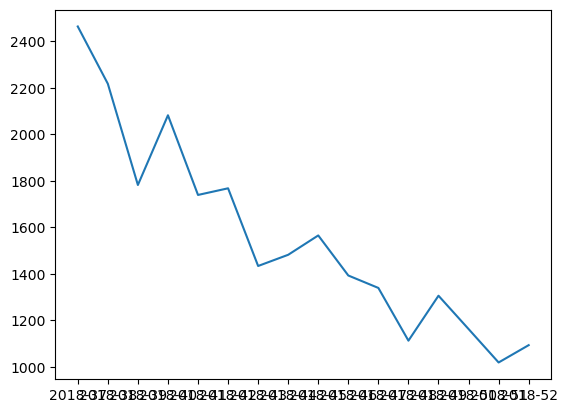

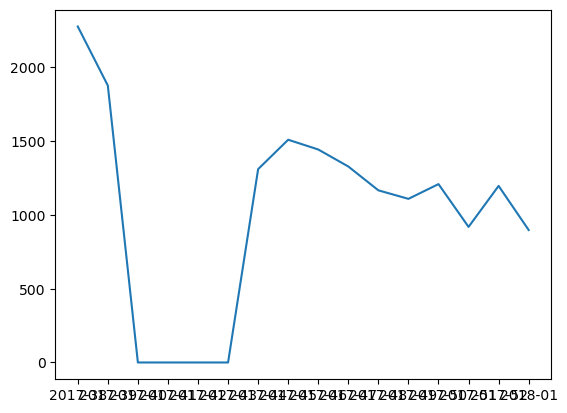

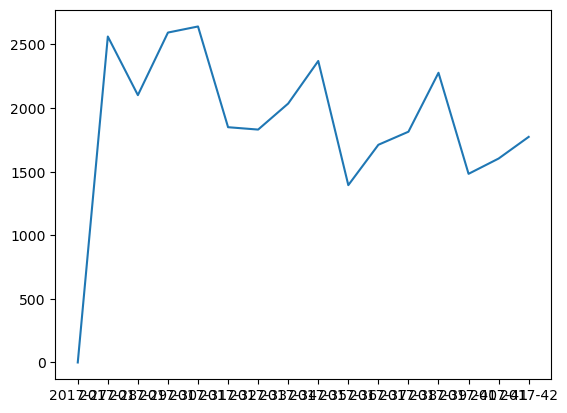

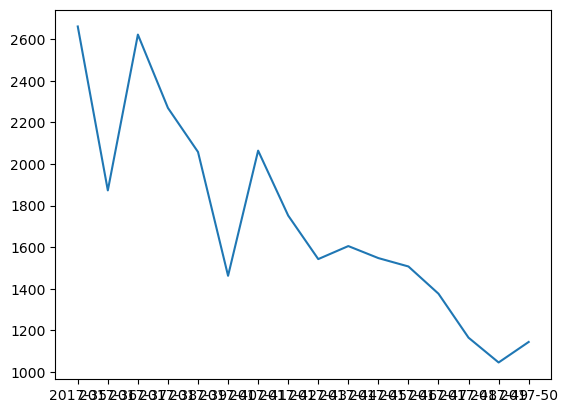

In [14]:
# from matplotlib import pyplot as plt
# for i in input_data.frmDist.unique():
#     sub_df = input_data[input_data.frmDist == i]
#     plt.plot(sub_df.frmYearWeek, sub_df.acSlrdQy)
#     plt.show()

In [ ]:
input_data.acSlrdQy